# CREDIT EDA STUDY

### OBJECTIVES (AS PROVIDED IN PROBLEM STATEMENT 2)

1)  `Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach        briefly.`

2) `Identify the missing data and use appropriate method to deal with it.(Remove columns/or replace it with an appropriate value)`

  NOTE:Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing           value,what should be the approach. Clearly mention the approach.
  
  
3) `Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.`

4) `Identify if there is data imbalance in the data. Find the ratio of data imbalance.`

  NOTE1: How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the      different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms   of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset (clients with payment        difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.
  
  NOTE2: Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.
  
  
5) `Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.`

6) `Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.`  

7) `Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases.`

### Reading the data and storing them in different dataframes

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Storing the 'previous_application' data in dataframe df1

df1= pd.read_csv('previous_application.csv') 
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df1.shape

(1670214, 37)

In [6]:
df1.columns    #checking the columns in df1

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [8]:
# Storing the 'application_data' in dataframe df2

df2= pd.read_csv('application_data.csv')
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df2.shape

(307511, 122)

In [10]:
df2.columns            #checking the columns in df1

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [11]:
df2.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [12]:
df2.YEARS_BUILD_AVG.describe()

count    103023.000000
mean          0.752471
std           0.113280
min           0.000000
25%           0.687200
50%           0.755200
75%           0.823200
max           1.000000
Name: YEARS_BUILD_AVG, dtype: float64

### 2) Identifying missing data and using/explaining the appropriate method to deal with it

### `Column Selection/Dropping`: 

#### Columns that have been chosen for EDA along with the reason for the same (Note: column description sheet had incorrect column numbers)
#### `1. In application_data.csv dataset, the initial 41 columns seem to be important as per the provided columns_description.csv dataset. These include contract type, flags whether client owns a car or not, credit amount of the applied loan, who was accompanying client when he/she came for application, client's age, etc.`
#### `2. Columns 42-44 are external data sources which are not to be considered in this particular exercise.`
#### `3. Columns 45-91 provide different attributes regarding the client's house. Out of these, column 45, APARTMENTS_AVG column 54, LANDAREA_AVG and column 48, YEARS_BUILD_AVG are retained as they can provide crucial information about the client's financial state for an extended period of time. Please note that these columns are all normalised in nature. Min value is 0 and max value is 1.`
#### `4. All columns from previous_applications.csv dataset are retained. The significance of each one of them and further pruning will be done in the course of this case study.`

In [13]:
df2ColNos=[x for x in range(41)]                #dropping and appending specific columns in df2
df2ColNos.append(44)
df2ColNos.append(47)
df2ColNos.append(53)
df2ColNos

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 44,
 47,
 53]

In [14]:
print(df2.columns[:10])

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY'],
      dtype='object')


In [15]:
df2ColNames=[df2.columns[x] for x in df2ColNos]     #checking the columns in df2
df2ColNames
#len(df2ColNames)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'APARTMENTS_AVG',
 'YEARS_BUILD_AVG',
 'LANDAREA_AVG']

In [16]:
df3AppData=df2[df2ColNames].copy()    #Application data (df2) is saved in a new name df3AppData
df3AppData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,APARTMENTS_AVG,YEARS_BUILD_AVG,LANDAREA_AVG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,Business Entity Type 3,0.0247,0.6192,0.0369
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,School,0.0959,0.7960,0.0130
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,Government,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,1,1,Religion,NaN,NaN,NaN


In [17]:
df4PrevApp=df1.copy()                  #Previous Application data (df1) is saved in a new name df4PrevApp
df4PrevApp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Identifying missing data

In [18]:
#checking for null values in df4PrevApp

df4PrevApp.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [19]:
#checking for null values in df3AppData

df3AppData.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

#### Handling missing data/methods

In [20]:
#Finding the percentage of missing values/Null values in df4PrevApp
df_a=df4PrevApp.isnull().sum()/len(df4PrevApp)*100
df_a

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [21]:
#Finding the percentage of missing values/Null values in df3AppData
df_b=df3AppData.isnull().sum()/len(df2)*100
df_b

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

#### `Method1:`It is found that 14 columns in 'previous application data',5 columns for 'application data' have null values greater than 13%.It is possible to drop these columns, but since dropping the columns might adversely affect the case study, and as mentioned in the objectives, these columns are retained.

#### `Method2:` It is also found that there are some columns with null values lesser than 13%, for example the column 'PRODUCT_COMBINATION ' (which is a categorical variable) has a null value percentage of 0.02%. In this case the missing values can be replaced/imputed by the mode value of the particular column which is 'Cash' (as shown below) for the column 'PRODUCT_COMBINATION '

In [22]:
df4PrevApp.PRODUCT_COMBINATION.mode()[0]

'Cash'

### 3) Identifying Outliers

In [23]:
#Finding outliers for dataframe df4PrevApp
df4PrevApp.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


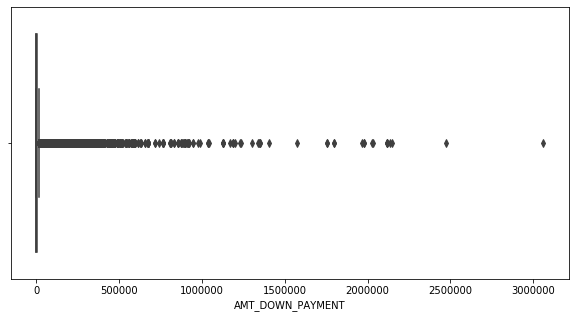

In [24]:
#using box plot to find the outlier in a specific column for df4PrevApp
plt.figure(figsize=(10,5))
sns.boxplot(df4PrevApp.AMT_DOWN_PAYMENT)
plt.show()

#### 1) Outliers are found to be present in the columns, AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT, DUE DATES etc.
#### 2) When there is a significant difference between the 75% value and the max value OR from the box plot, if the maximum value is far off from the IQR, we could say those max values are the outliers .These outliers will have a significant impact on the mean value as the above table.

In [25]:
#Finding outliers for dataframe df3AppData
df3AppData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,APARTMENTS_AVG,YEARS_BUILD_AVG,LANDAREA_AVG
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,151450.00000,103023.000000,124921.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.11744,0.752471,0.066333
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.10824,0.113280,0.081184
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05770,0.687200,0.018700
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.08760,0.755200,0.048100
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.14850,0.823200,0.085600
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


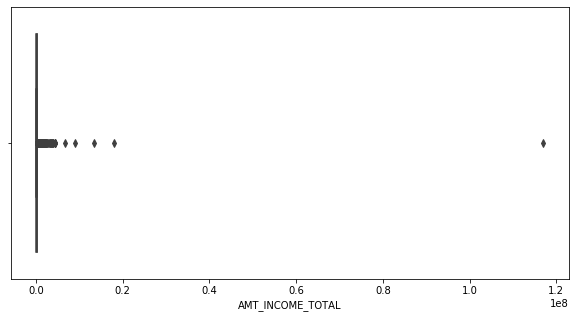

In [26]:
#using box plot to find the outlier in a specific column for df3AppData
plt.figure(figsize=(10,5))
sns.boxplot(df3AppData.AMT_INCOME_TOTAL)
plt.show()

#### 1) Outliers are found to be present in the columns, AMT_INCOME_TOTAL,CNT_CHILDREN,AMT_ANNUITY,DAYS_EMPLOYED etc.
#### 2) When there is a significant difference between the 75% value and the max value OR from the box plot, if the maximum value is far off from the IQR, we could say those max values are the outliers.These outliers will have a significant impact on the mean value as the above table.



### 4) Identifying data imbalance & finding the ratio of data imbalance

### Derived Metrics

#### Creating bins for columns  'AMT_INCOME_TOTAL' and 'AMT_CREDIT' which are continous variable categories

In [27]:
# Bins are created for Income of the people from Appication Data

bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,1000000000]
slot = ['0-50000','50000-100000','100000-150000', '150000-200000','200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']
df3AppData['INCOME_RANGE']=pd.cut(df3AppData['AMT_INCOME_TOTAL'],bins,labels=slot)
df3AppData['INCOME_RANGE']

0         200000-250000
1         250000-300000
2          50000-100000
3         100000-150000
4         100000-150000
              ...      
307506    150000-200000
307507     50000-100000
307508    150000-200000
307509    150000-200000
307510    150000-200000
Name: INCOME_RANGE, Length: 307511, dtype: category
Categories (11, object): [0-50000 < 50000-100000 < 100000-150000 < 150000-200000 ... 350000-400000 < 400000-450000 < 450000-500000 < 500000 and above]

In [28]:
# Bins are created for for Credit amount of the loan from Appication Data 

bins = [0,200000,300000,400000,500000,600000,700000,800000,900000,1000000000]
slot = ['0-200000','200000-300000', '300000-400000','400000-500000','500000-600000','600000-700000','700000-800000',
        '800000-900000','900000 and above']
df3AppData['CREDIT_RANGE']=pd.cut(df3AppData['AMT_CREDIT'],bins=bins,labels=slot)
df3AppData['CREDIT_RANGE']

0            400000-500000
1         900000 and above
2                 0-200000
3            300000-400000
4            500000-600000
                ...       
307506       200000-300000
307507       200000-300000
307508       600000-700000
307509       300000-400000
307510       600000-700000
Name: CREDIT_RANGE, Length: 307511, dtype: category
Categories (9, object): [0-200000 < 200000-300000 < 300000-400000 < 400000-500000 ... 600000-700000 < 700000-800000 < 800000-900000 < 900000 and above]

#### Age is derived from the column DAYS_BIRTH' where age is in terms of the days and binning the column AGE

In [50]:
# converting DAYS_BIRTH into age interms of years

df3AppData['AGE']=df3AppData['DAYS_BIRTH']/-365
df3AppData['AGE']

# Bins are created for for Age from Appication Data 

bins = [0,10,20,30,40,50,60,70,80,90,100]
slot = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90+']
df3AppData['AGE_BRACKET']=pd.cut(df3AppData['AGE'],bins=bins,labels=slot)
df3AppData['AGE_BRACKET']

0         20-30
1         40-50
2         50-60
3         50-60
4         50-60
          ...  
307506    20-30
307507    50-60
307508    40-50
307509    30-40
307510    40-50
Name: AGE_BRACKET, Length: 307511, dtype: category
Categories (10, object): [0-10 < 10-20 < 20-30 < 30-40 ... 60-70 < 70-80 < 80-90 < 90+]

In [51]:
df3AppData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,APARTMENTS_AVG,YEARS_BUILD_AVG,LANDAREA_AVG,INCOME_RANGE,CREDIT_RANGE,AGE,AGE_BRACKET
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,0.0247,0.6192,0.0369,200000-250000,400000-500000,25.920548,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,0.0959,0.7960,0.0130,250000-300000,900000 and above,45.931507,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,NaN,NaN,NaN,50000-100000,0-200000,52.180822,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,NaN,NaN,NaN,100000-150000,300000-400000,52.068493,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,1,Religion,NaN,NaN,NaN,100000-150000,500000-600000,54.608219,50-60


In [52]:
# The dataset Application data(df3AppData) is divided into two datasets with target=1(client with payment difficulties) and target=0(all other)

NoDiff=df3AppData.loc[df3AppData["TARGET"]==0]
Diff=df3AppData.loc[df3AppData["TARGET"]==1]

NoDiff.head()  # Clients without any payment difficulties

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,APARTMENTS_AVG,YEARS_BUILD_AVG,LANDAREA_AVG,INCOME_RANGE,CREDIT_RANGE,AGE,AGE_BRACKET
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,0.0959,0.796,0.013,250000-300000,900000 and above,45.931507,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,NaN,NaN,NaN,50000-100000,0-200000,52.180822,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,NaN,NaN,NaN,100000-150000,300000-400000,52.068493,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,1,Religion,NaN,NaN,NaN,100000-150000,500000-600000,54.608219,50-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,Other,NaN,NaN,NaN,50000-100000,400000-500000,46.413699,40-50


In [53]:
Diff.head()   # Clients with payment difficulties

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,APARTMENTS_AVG,YEARS_BUILD_AVG,LANDAREA_AVG,INCOME_RANGE,CREDIT_RANGE,AGE,AGE_BRACKET
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,0.0247,0.6192,0.0369,200000-250000,400000-500000,25.920548,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,Business Entity Type 3,0.0165,NaN,0.0265,100000-150000,900000 and above,51.298630,50-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,Business Entity Type 3,0.1309,0.9456,0.0142,200000-250000,900000 and above,47.895890,40-50
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,Self-employed,NaN,NaN,NaN,100000-150000,200000-300000,36.668493,30-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,XNA,NaN,NaN,NaN,50000-100000,200000-300000,67.928767,60-70


In [54]:
len(NoDiff.TARGET)

282686

In [55]:
len(Diff.TARGET)

24825

In [56]:
# Calculating the Imbalance between the Clients with and without any payment difficulties

round(len(NoDiff)/len(Diff),2)

11.39

#### The imbalance ratio is found to be 11.39% between the Clients with and without any payment difficulties

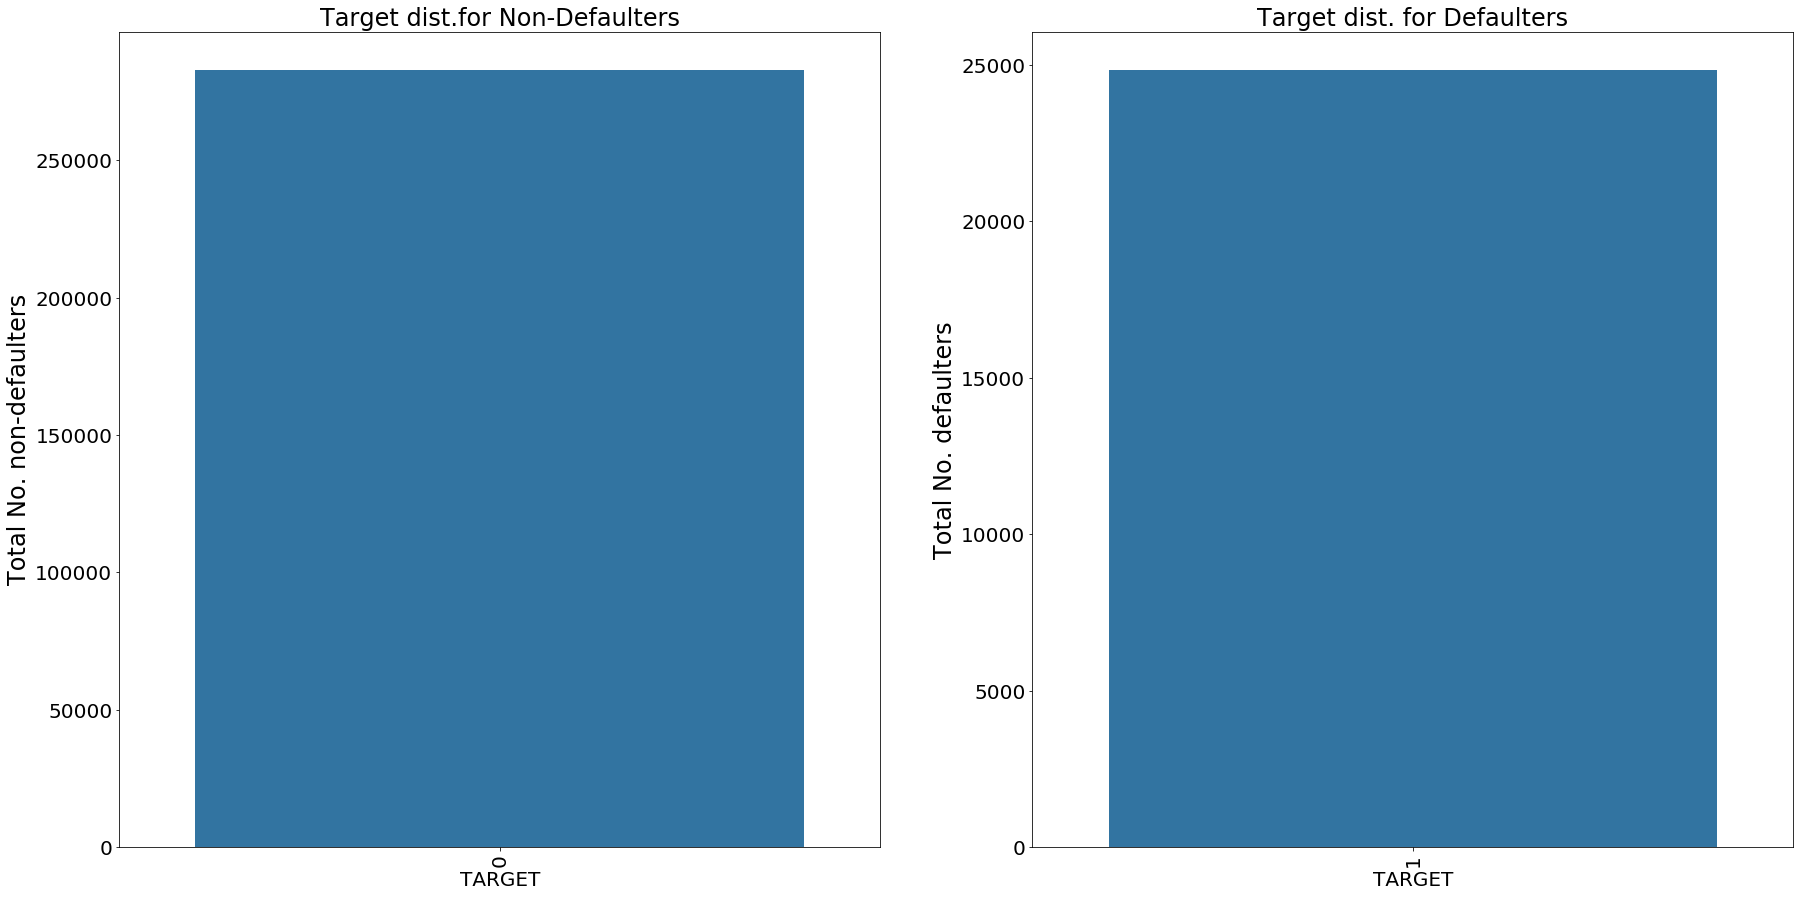

In [57]:
#Alternatively, using a Bar Plot we can compare the imbalance between the above

def plotfunc(var):
    plt.figure(figsize=(30,15))
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=NoDiff)
    plt.title('Target dist.for Non-Defaulters', fontsize=24)
    plt.xlabel(var, fontsize=20)
    plt.ylabel('Total No. non-defaulters',fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(rotation=90)
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=Diff)
    plt.title('Target dist. for Defaulters', fontsize=24)
    plt.xlabel(var, fontsize=20)
    plt.ylabel('Total No. defaulters',fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(rotation=90)
    plt.show()
plotfunc('TARGET')

#### There is a definite difference in the count of Non-defaulters to defaulters (250,000 compared to 25,000), which can be read instantly from the difference in the y axis values of the barplot as above, which also shows us that the chances of a client being a defaulter is quite less in the given dataset

### UniVariate Analysis

#### Income Amount (Ordered Categorical Variable)

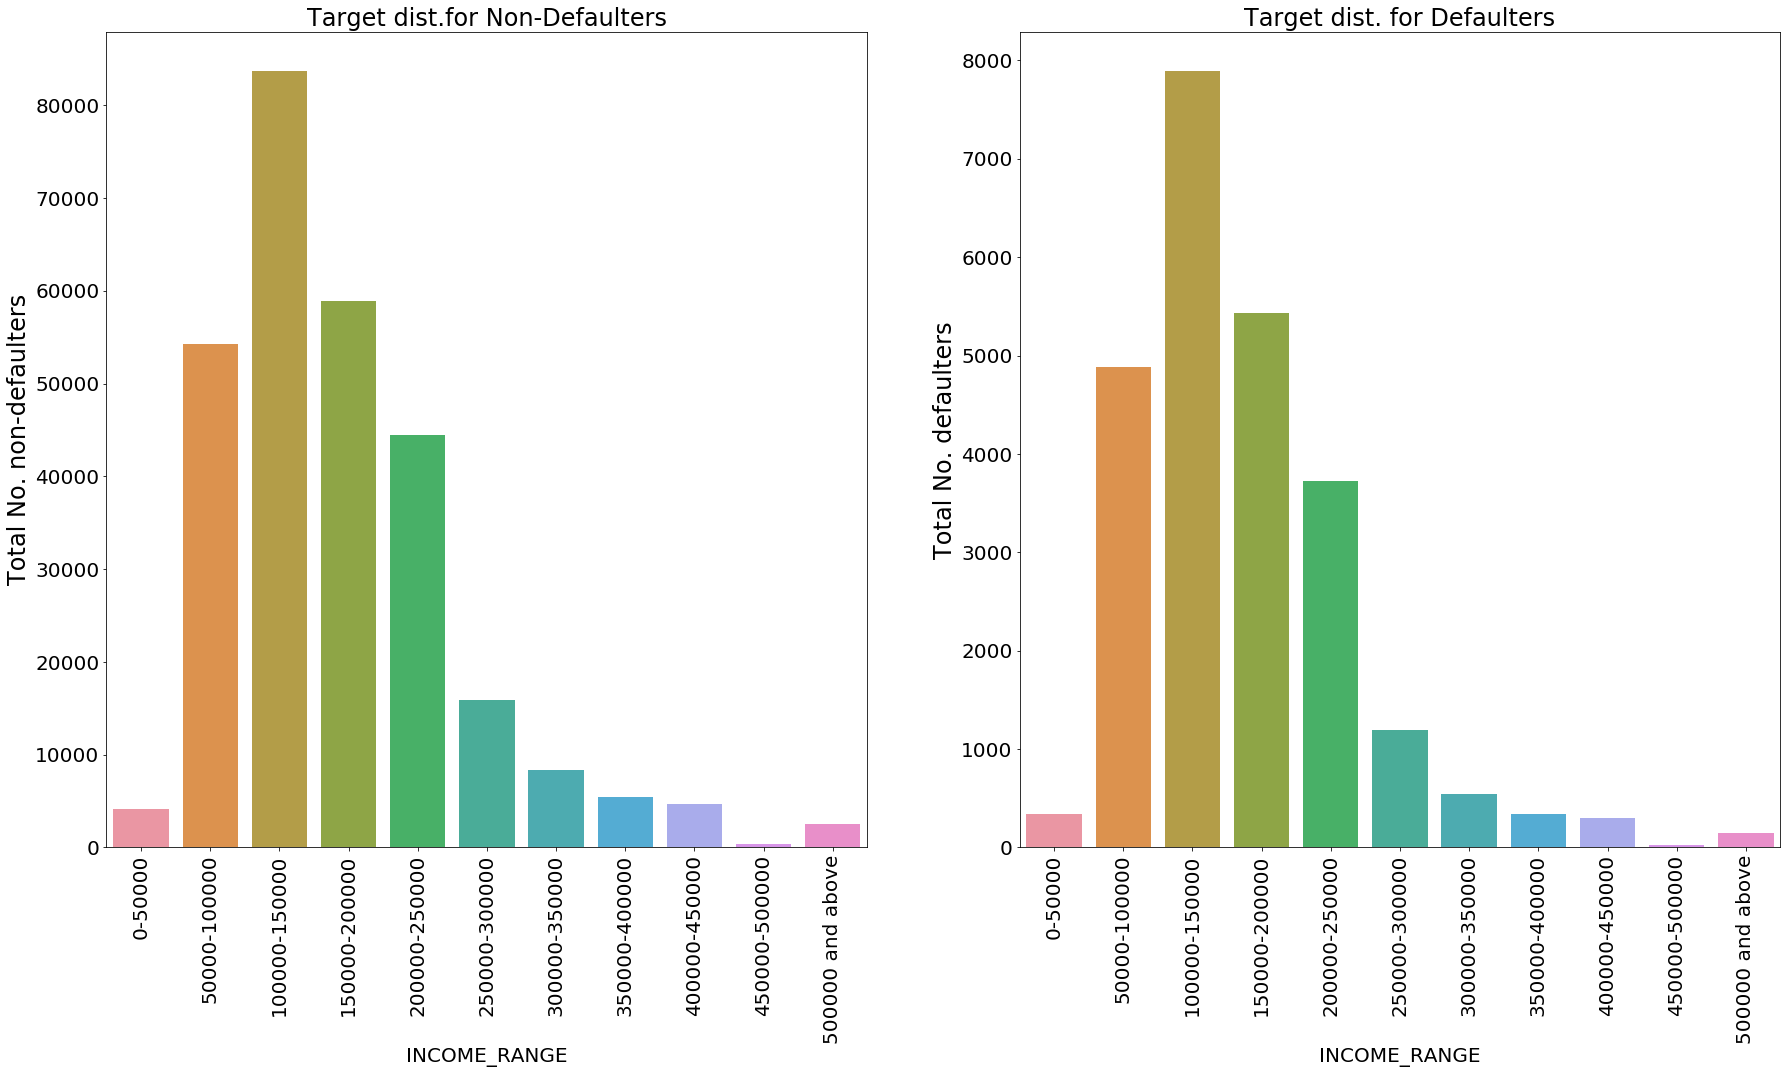

In [58]:
plotfunc('INCOME_RANGE')

It is observed that the Income range cannot be directly related to default as both the defaulters and non-defaulters showcase similar distributions. The y-axis values are different as the total number of defaulters is far less than the non-defaulters.

#### Credit Amount of the Loan (Ordered Categorical Variable)

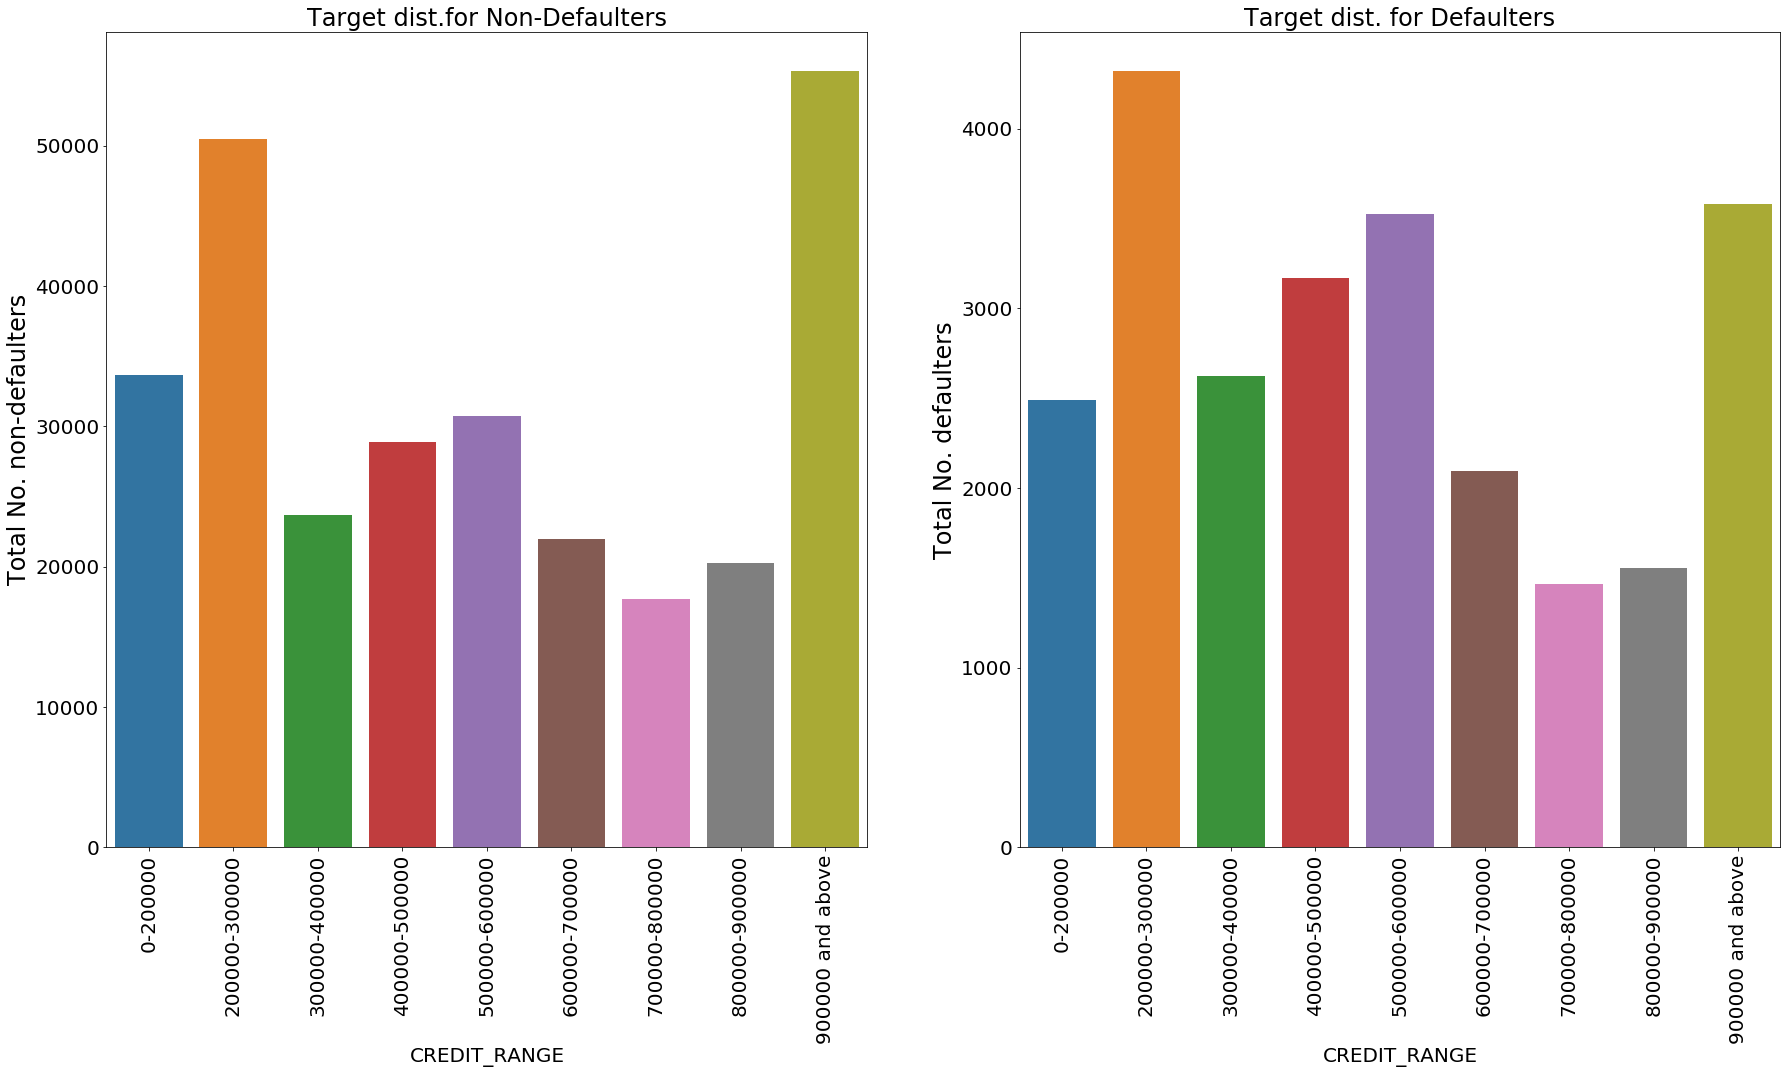

In [59]:
plotfunc('CREDIT_RANGE')

Following are the insights from the above plot:
1. Among non defaulters, the highest credit is for a relatively low credit range of 9+ lakhs range, followed by 2-3 lakhs range. This shows that either people with low loan amount do not default or the ones who are rich enough to pay off high loan amounts do no default. A pivot table analysis can explain this better.
2. Among defaulters too the same two ranges show highest peaks in the reverse order. So again, the same range of credit is risky as it has a high probability to both default or if the loan is not granted a customer can be lost.


#### Age Bracket (Ordered Categorical Variable)

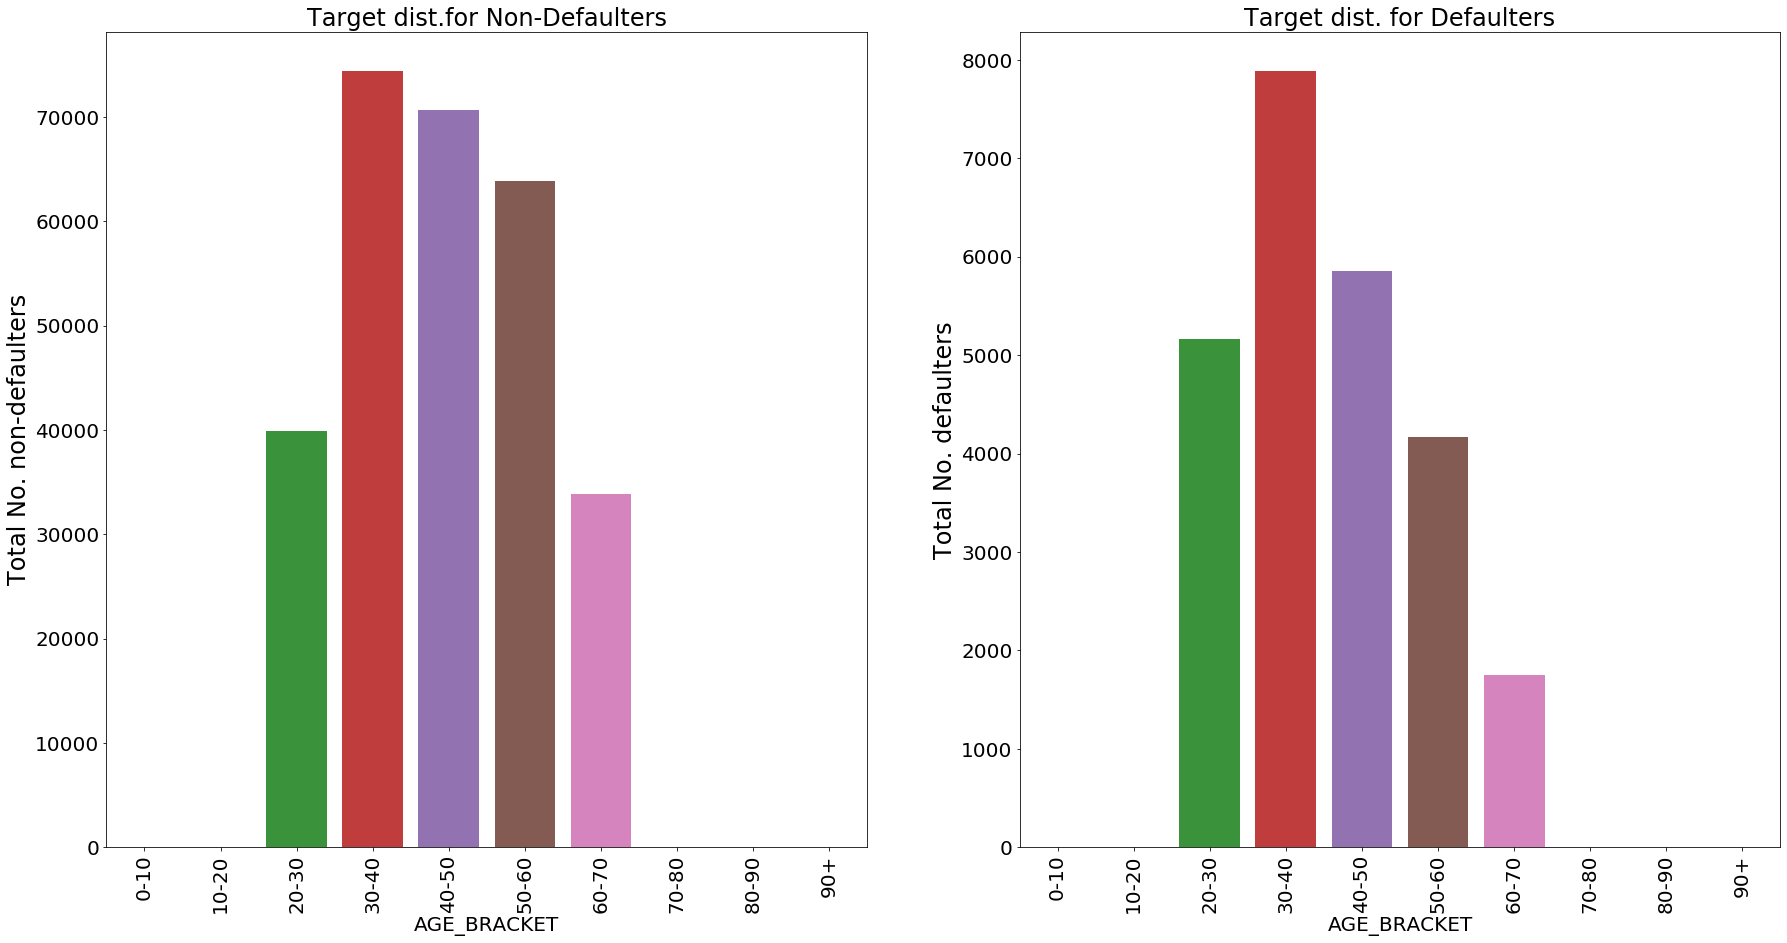

In [60]:
plotfunc('AGE_BRACKET')


30-40 year olds show a high amount of default and non-defaults too. Hence, applications of people falling under this age range should be further scrutinised.However, the number of defaulters reduce significantly as they age, i.e. their numbers reduce from ages 30-70 in a linear way.

#### Gender Distribution (Ordered Categorical Variable)

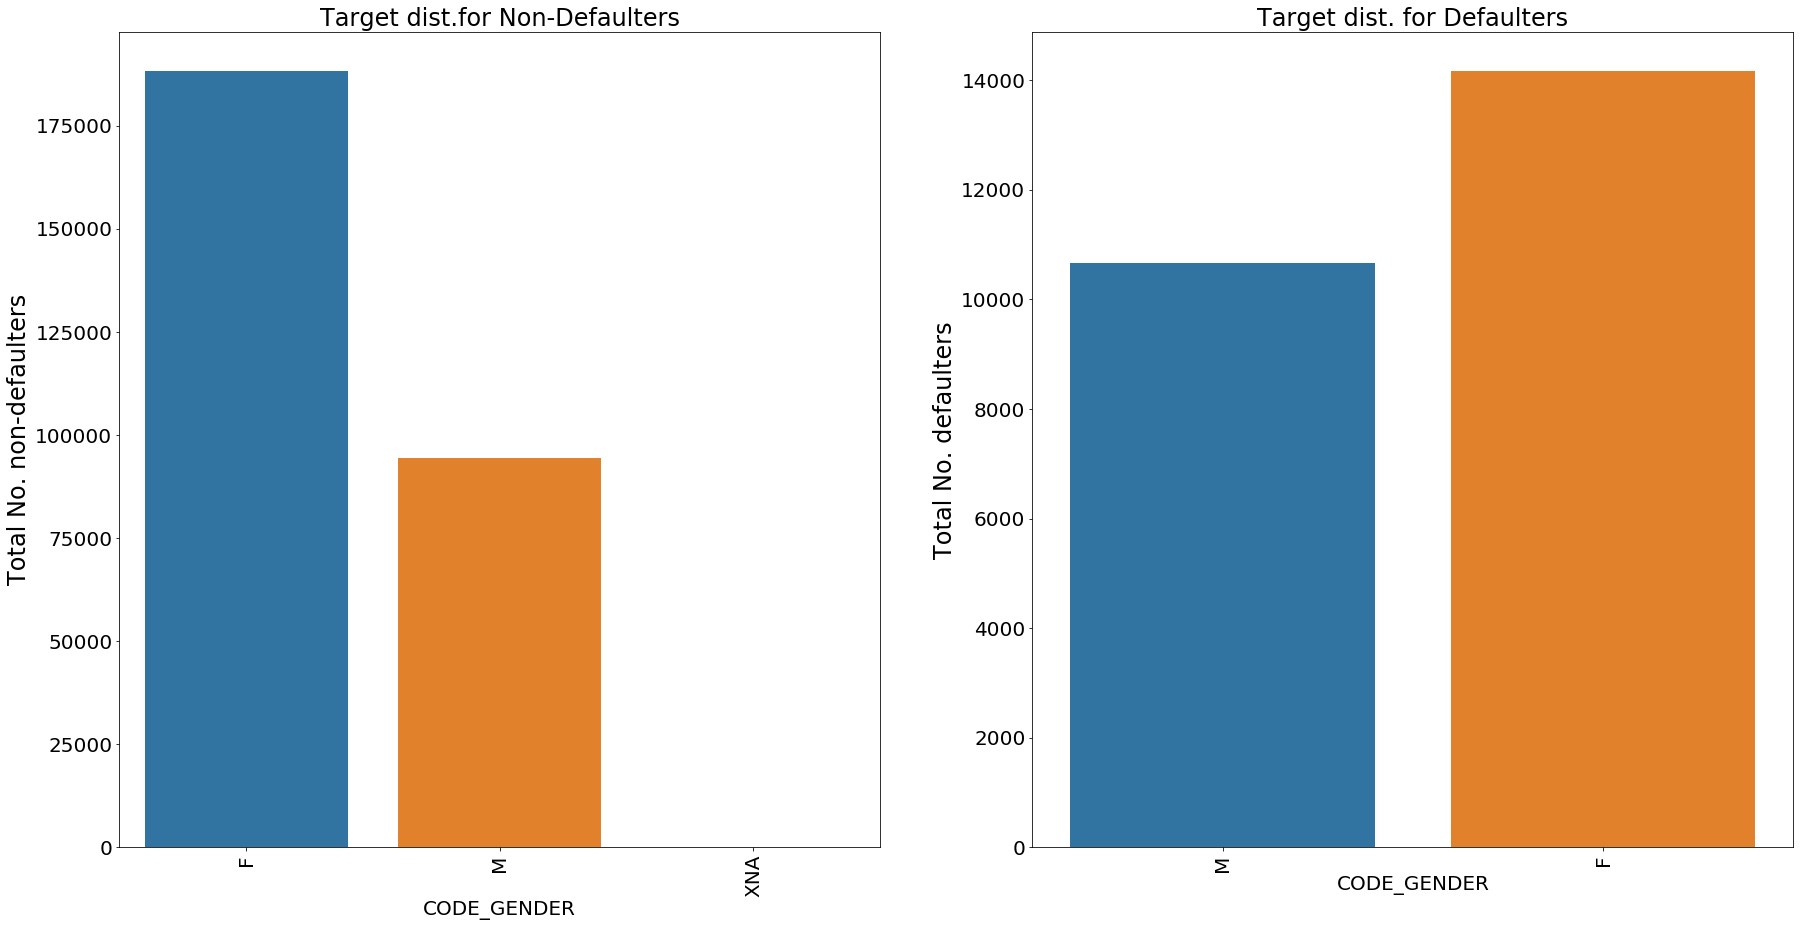

In [61]:
plotfunc('CODE_GENDER')

A relatively low number of Males default as compared to Females. This is confirmed by both the non-default and the default bar plots above.

#### Income Type (Unordered Categorical Variable)

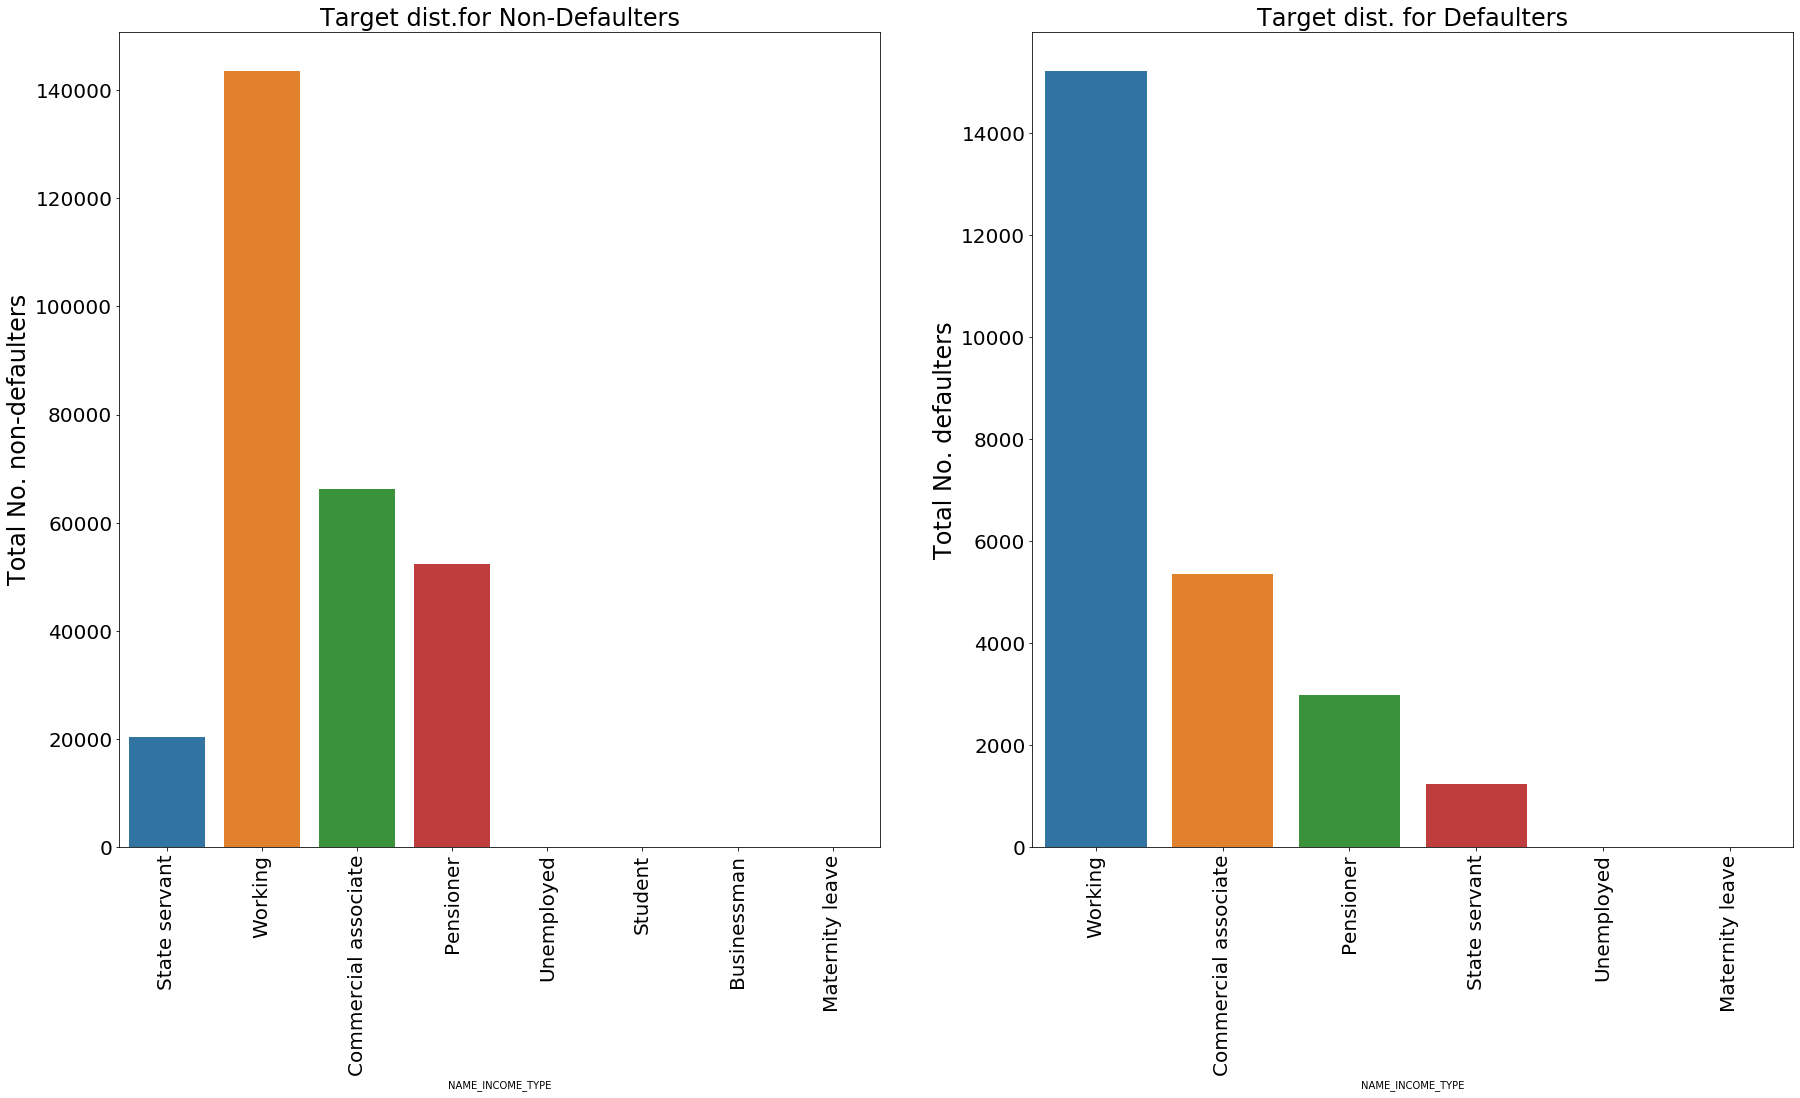

In [39]:
plotfunc('NAME_INCOME_TYPE')

Both profession based default as well non-default go hand in hand and univariate analysis cannot be used for this particular comparison to find insights. But it is noted that Pensioners tend to default less

#### Occupation Type (Unordered Categorical Variable)

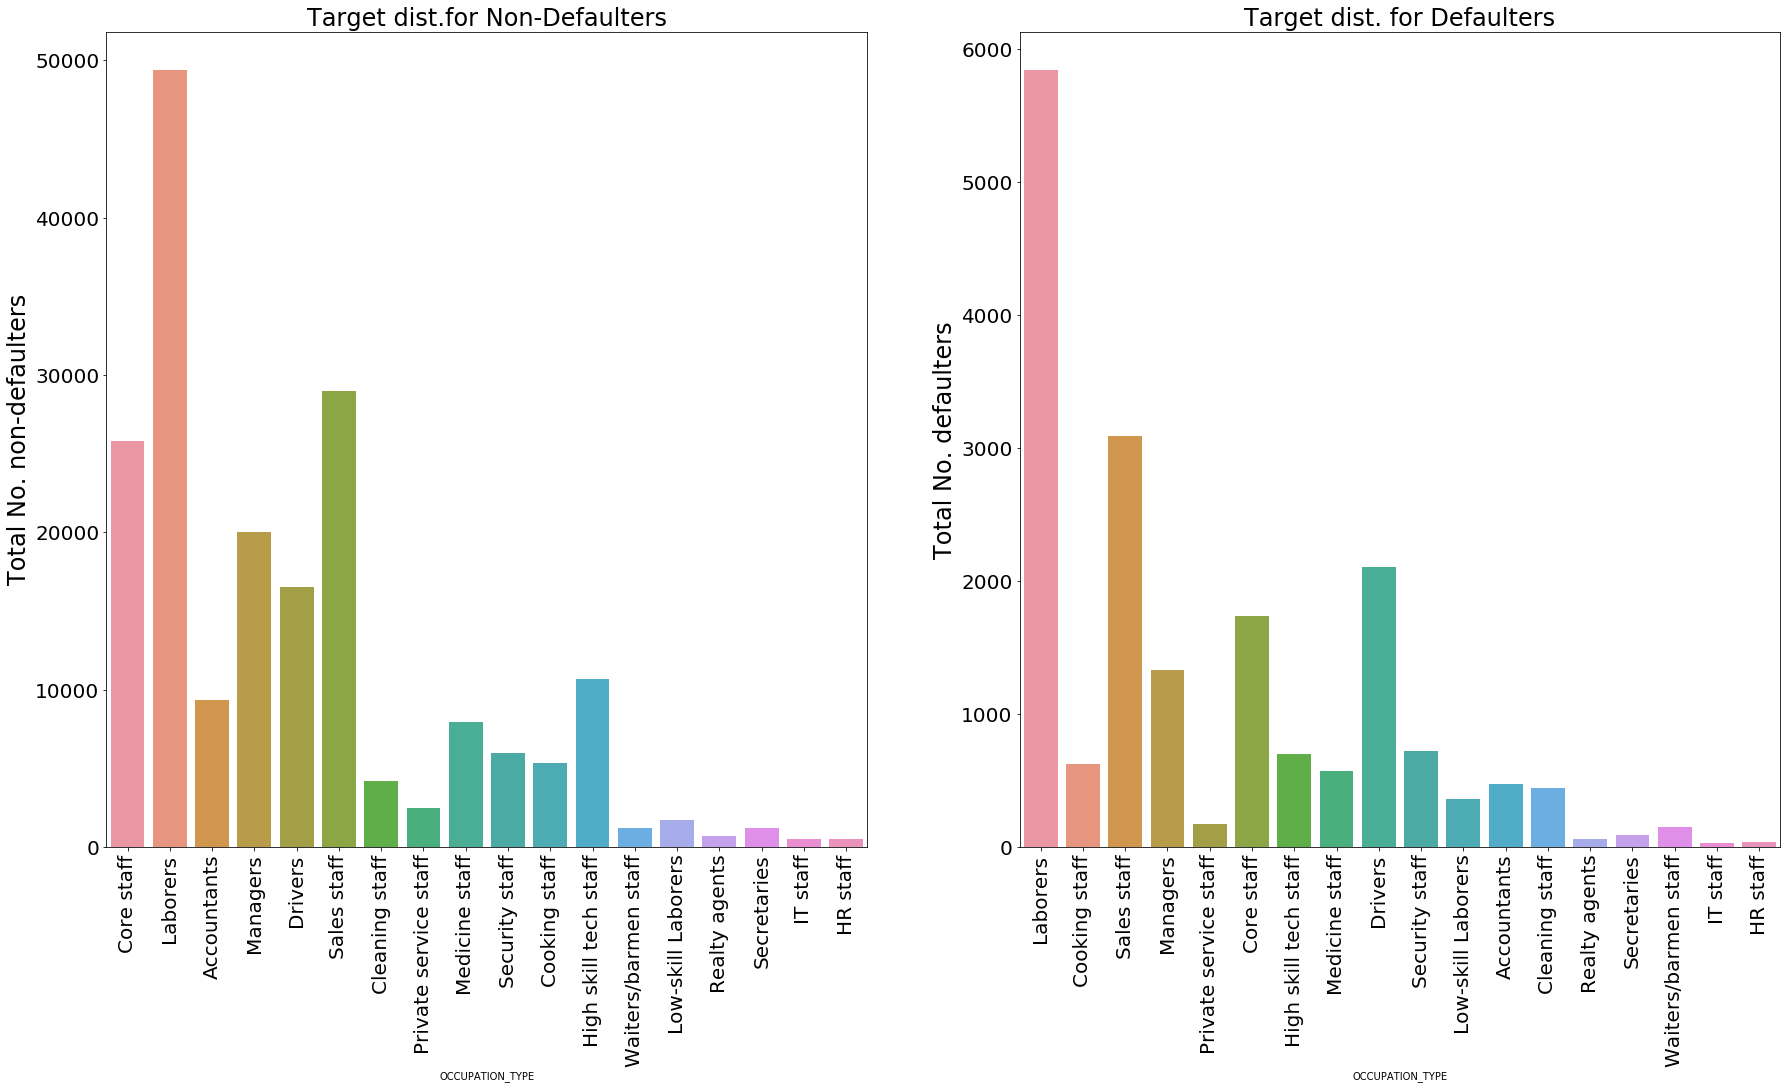

In [40]:
plotfunc('OCCUPATION_TYPE')

- Most loans are applied by laborers and they are among the highest defaulters too. Interestingly, drivers tend to default more than core staff although core staff professionals took more loans.
- IT staff, HR staff,Secretaries etc.. have applied for very less number of loans

#### Famliy status(Unordered Categorical Variable)

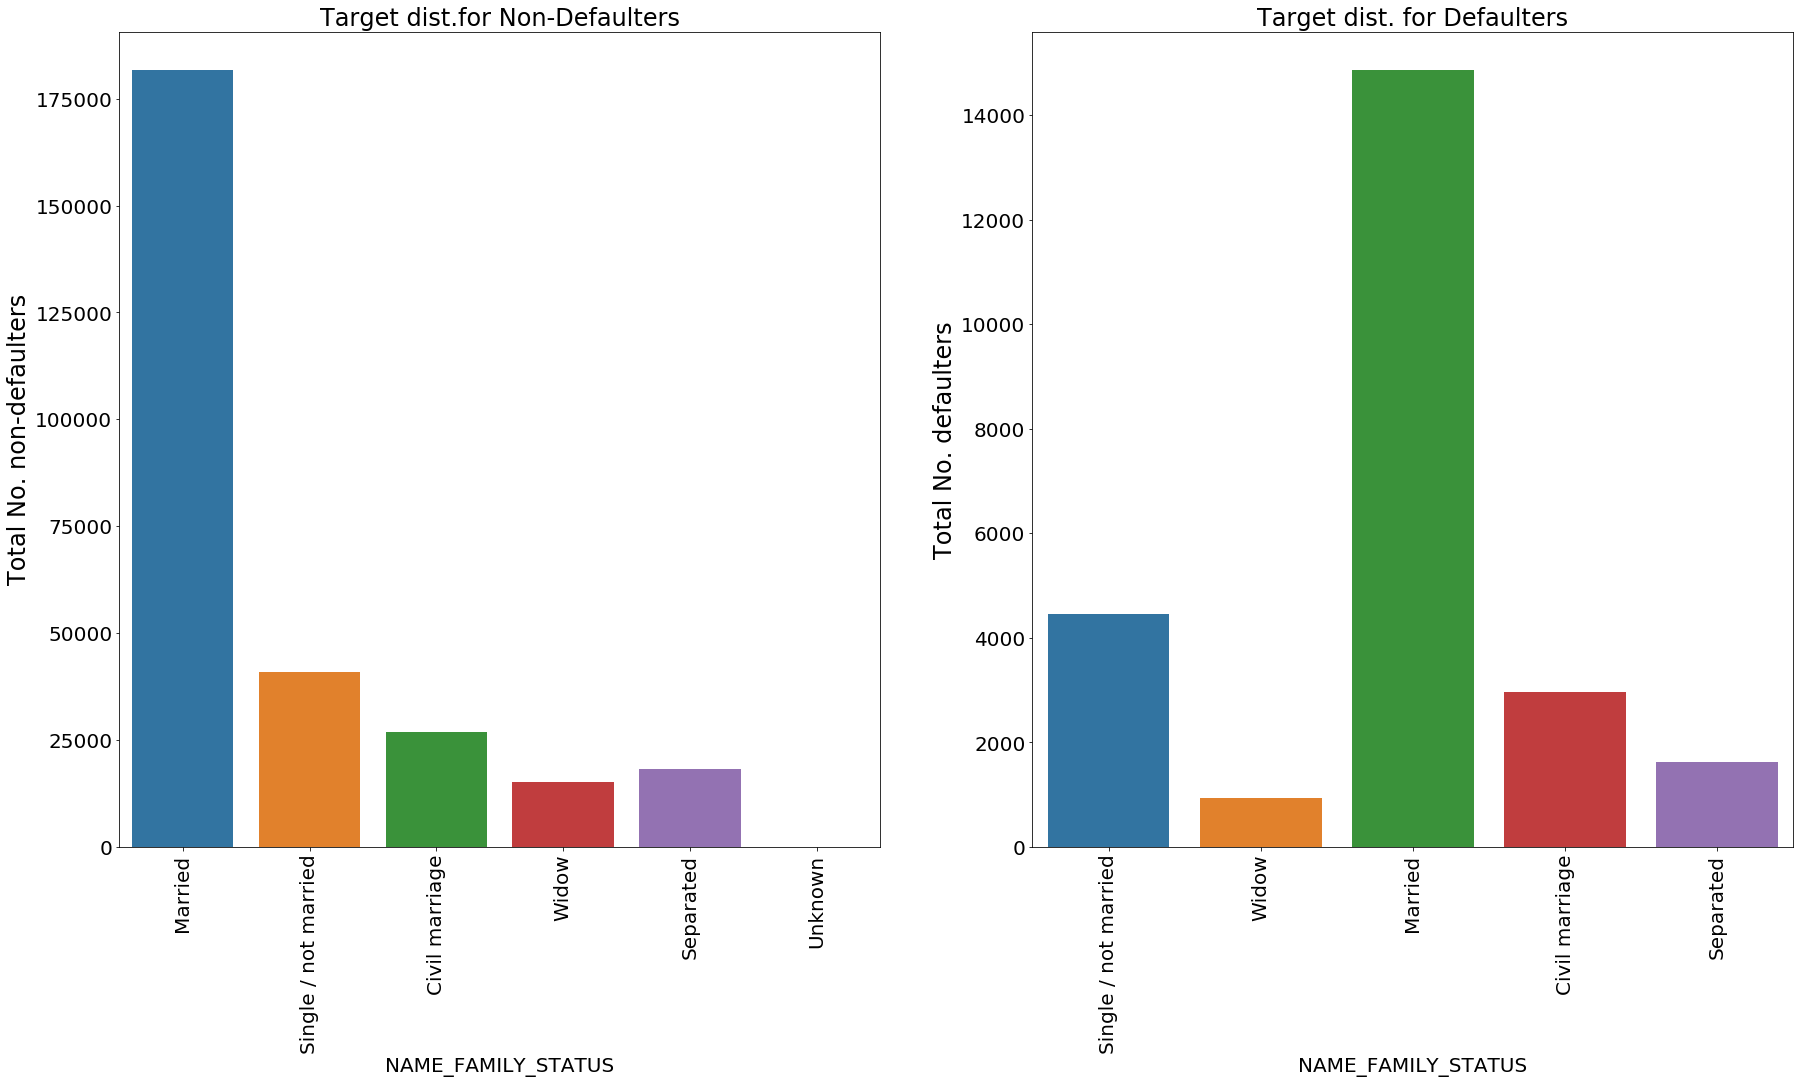

In [63]:
plotfunc('NAME_FAMILY_STATUS')

Univariate analysis cannot be used in this particular case to find insights as both the default and non-default plots show same relative distribution.But it is interesting to find that married people apply for most loans

#### Contract product Type(Ordered Categorical Variable)

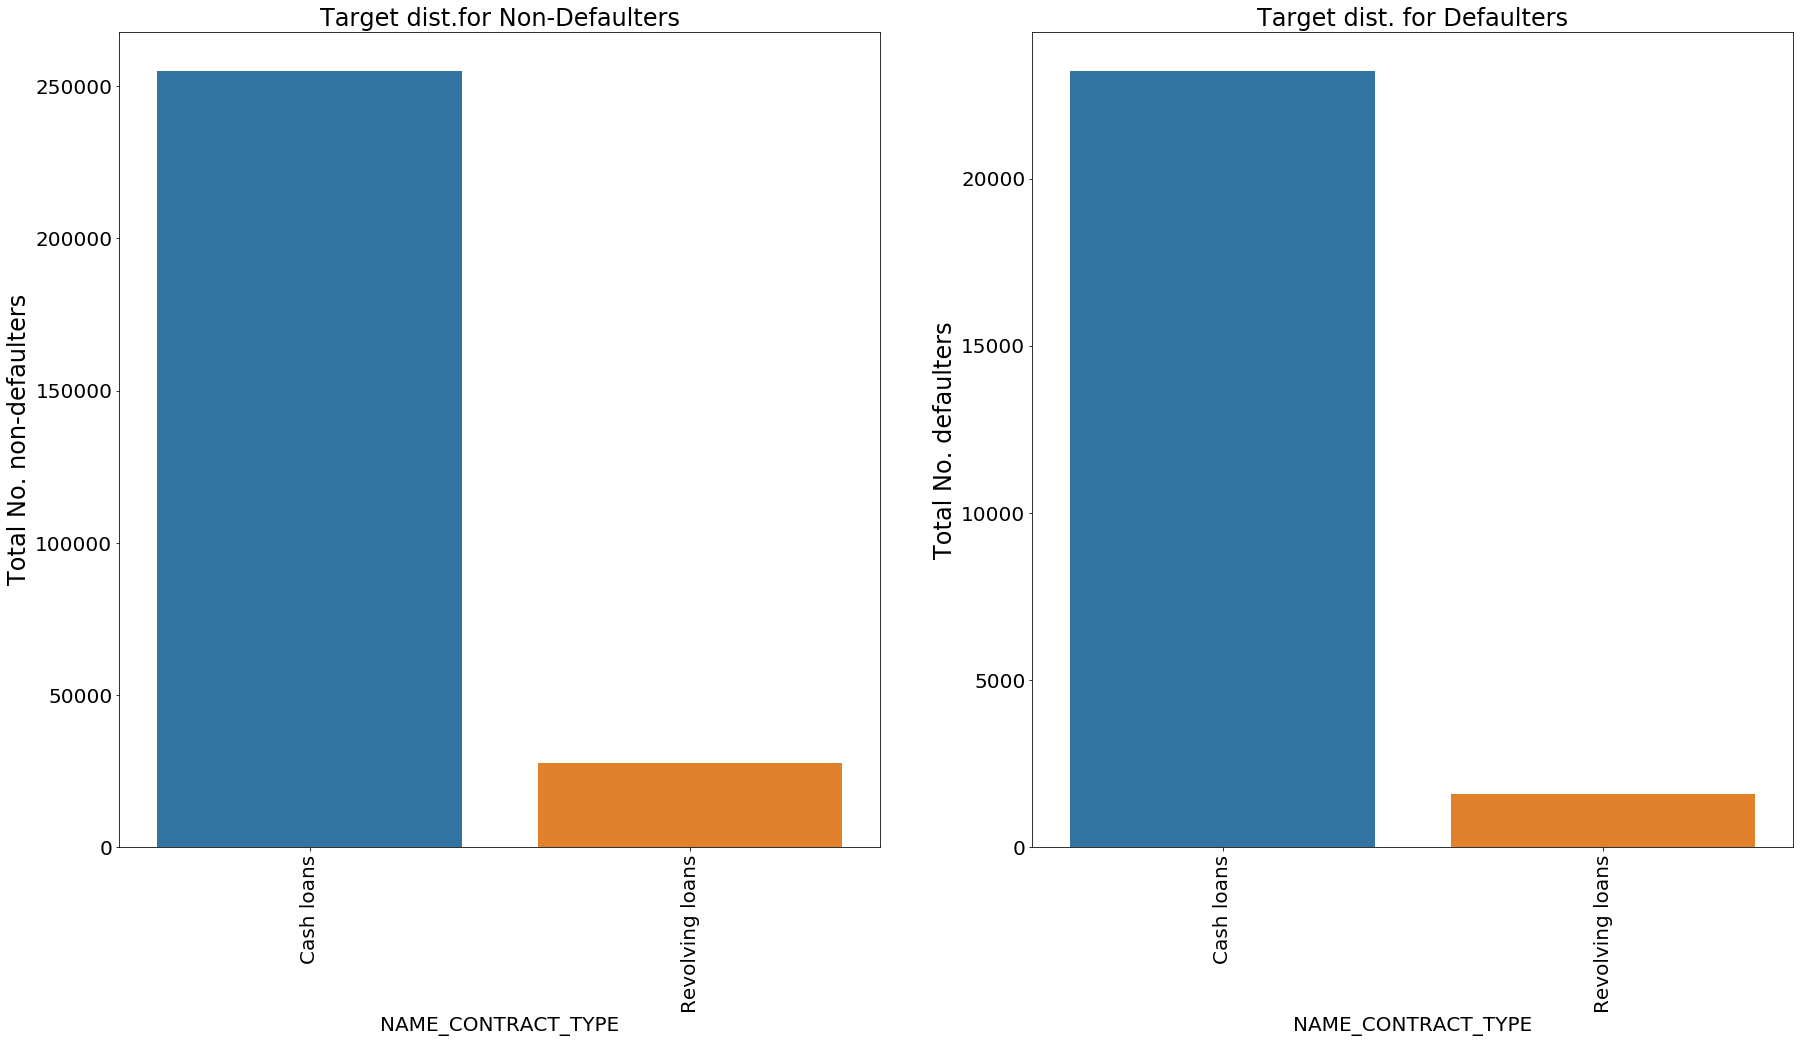

In [64]:
plotfunc('NAME_CONTRACT_TYPE')

Univariate analysis cannot be used in this particular case to find insights as both the default and non-default plots show same relative distribution.

#### Organization type of Defaulters/Non-Defaulters

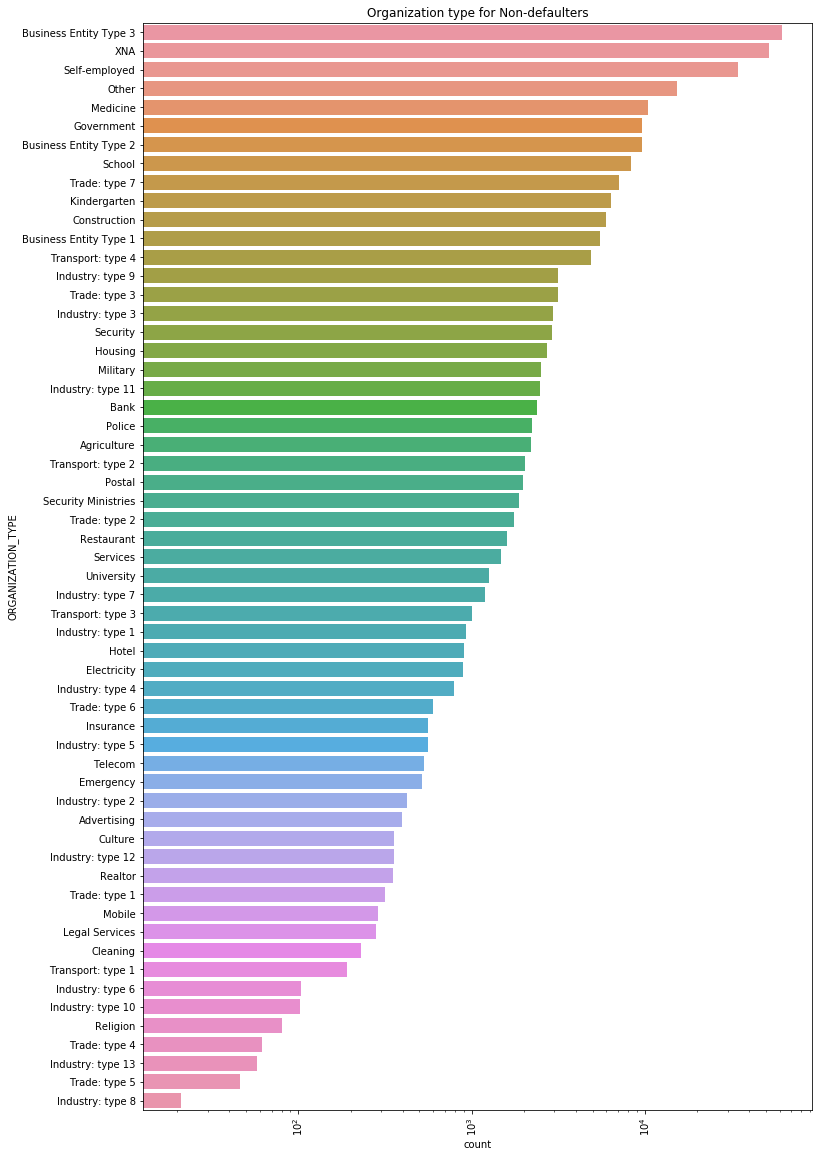

In [66]:
plt.figure(figsize=(12,20))
plt.title("Organization type for Non-defaulters")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=NoDiff,y='ORGANIZATION_TYPE',order=NoDiff['ORGANIZATION_TYPE'].value_counts().index)
plt.show()



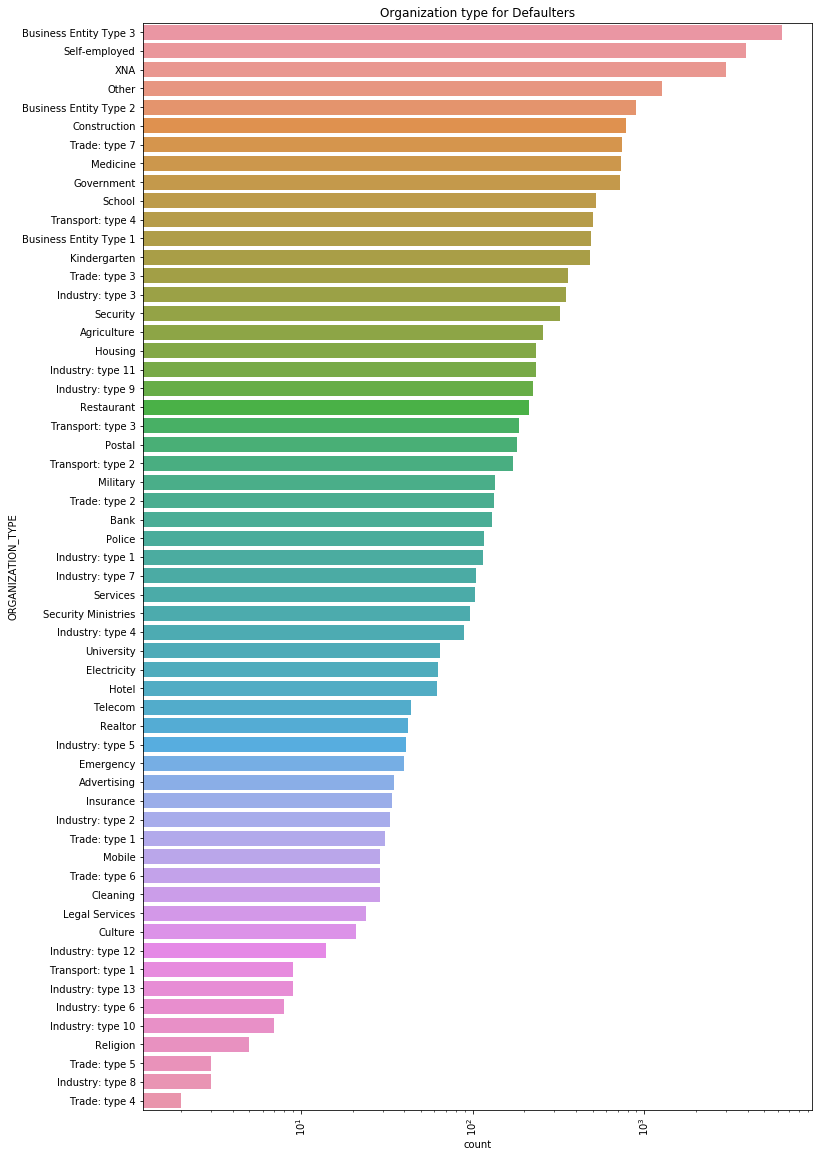

In [67]:
plt.figure(figsize=(12,20))
plt.title("Organization type for Defaulters")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=Diff,y='ORGANIZATION_TYPE',order=Diff['ORGANIZATION_TYPE'].value_counts().index)
plt.show()

Follwoing are the insights from the above plots:
1. Business Entity type 3 and self-employed professionals apply for the most number of loans and hence show highest default as well as non-default. Hence, further analysis is required to take better decsions of loan approvals from such professionals.
2. Professionals from Medicine sector tend to not default. They are relatively safer to have business with.
3. A relatively large number of people from construction business tend to default.
4. Government sector employees tend to show lower default rates as compared to business entity types 2 and 3, self-employed as well as employess from medicine sector.
5. Agriculture sector shows higher default than housing.

### Bi-variate Analysis

#### Income range Vs Loan/Credit Amount (w.r.to Family status)

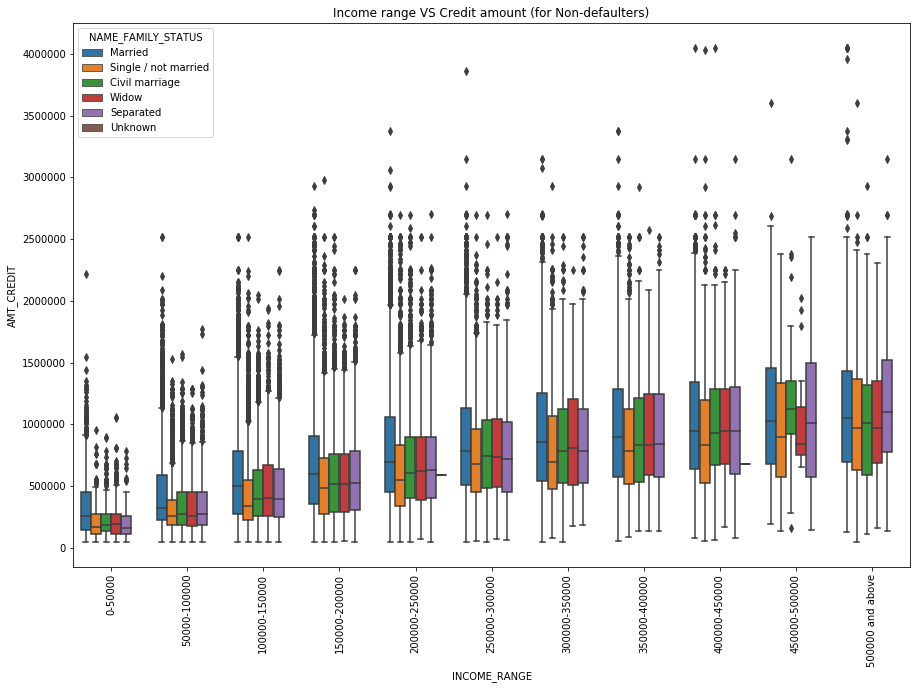

In [68]:
plt.figure(figsize=(15,10))
sns.boxplot(data =NoDiff, x='INCOME_RANGE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Income range VS Credit amount (for Non-defaulters)')
plt.xticks(rotation=90)
plt.show()

A large number of outliers tend to skew the results but follwoing are some insights from the above plot:
1. A general trend of higher credit amount is seen with increasing income range for all family types.
2. The range of credit amount gets highers with increasing income range. But, post income range of 3.5 lakhs and above, the credit range starts to stabilize.
3. Large concentration of low income range people receive a similar credit amount as can be seen by the with of IQR of the income group 0-50000. This range gets wider as the income range increases.
4. Married people have the highest IQR among all other family types thus suggesting varying amounts of credit range.
5. Most outliers in terms of credit amount also happen to fall in the married category of customers.
6. For the high income range customers earning 5 lakhs and above, the median credit amount values of all family types are similar and around 10 lakhs.
7. Single or non-married applicants have lowest median credit amount in almost all income ranges. This also means for high income unmarried/single people, it will be easier to pay off their loans as compared to other family types.
8. Most Separated people earning more than 4 lakhs income have amount credited that is similar or greater in amount to the amount credited for married people.

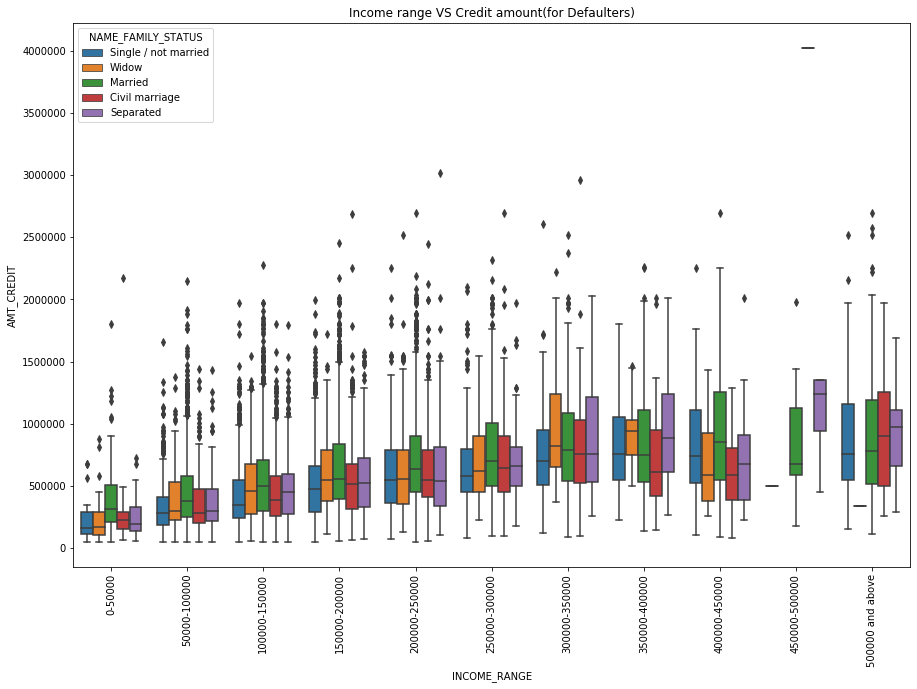

In [69]:
plt.figure(figsize=(15,10))
sns.boxplot(data =Diff, x='INCOME_RANGE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Income range VS Credit amount(for Defaulters)')
plt.xticks(rotation=90)
plt.show()

Again, a large number of outliers tend to skew the results but follwoing are some insights from the above plot:
1. Here too among defaulters, a general trend of higher credit amount is seen with increasing income range for all family types.
2. The range gets stabilized for incomes above 3 lakhs.
3. Married people are among the highest defaulters in low income categories.
4. Also, single or unmarried people tend to default less as compared to married people in the low income categories.
5. In the range of incomes above 3 lakhs and exculding the 4-4.5 lakh range, in all the other ranges, separated people are among the highest defaulters.
6. The same trend is not seen in low income categories, which means of the credited amount/ loan amount is reduced yet approved, they will be able to pay off the loans, hence the bank will not lose its customers and also not suffer due to payment defaults.
7. The outliers tend to bunch up towards the center of the plot, which suggests applicants falling in medium income categories with high credited amounts of 1.5 lakhs and above tend to default.


#### Income range Vs Age (w.r.to Family status)

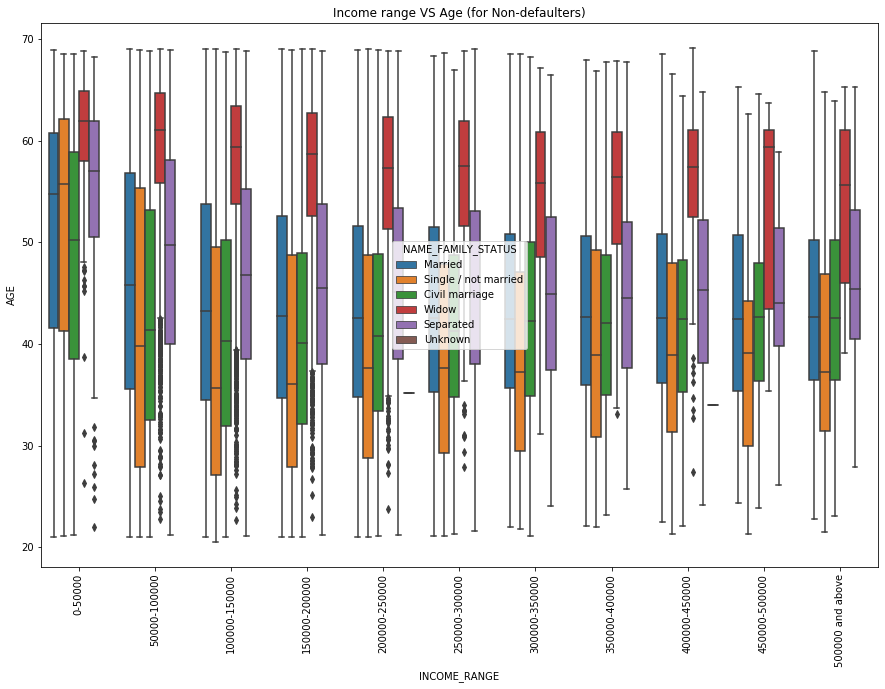

In [71]:
plt.figure(figsize=(15,10))
sns.boxplot(data =NoDiff, x='INCOME_RANGE',y='AGE', hue ='NAME_FAMILY_STATUS')
plt.title('Income range VS Age (for Non-defaulters)')
plt.xticks(rotation=90)
plt.show()

Based on the above plot, the following insights can be figured out:
1. Low income applicants of varying ages apply for loans. The spread of ages of applicants reduces with increase in the income.
2. Firstly, most widows are of relatively higher age as compared to the rest of the family status categories.
3. Also, as intuitively thought, most single or unmarried people have relatively lower age than the other family status categories.
4. Almost all outliers are observed in the Widow category with most not defaulting. These are of low age groups.
5. People of higher age groups generally fall under low income category.

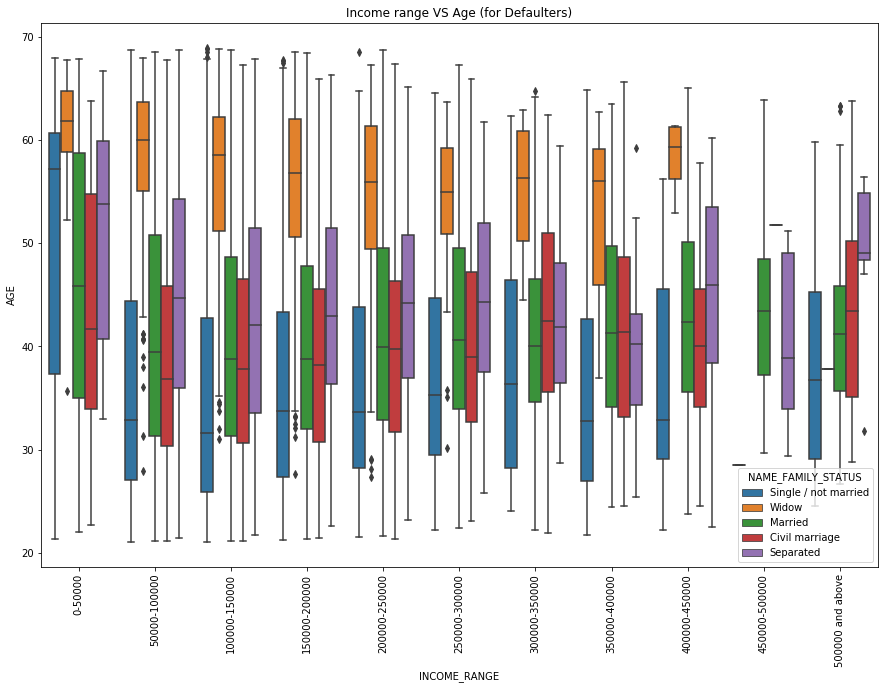

In [72]:
plt.figure(figsize=(15,10))
sns.boxplot(data =Diff, x='INCOME_RANGE',y='AGE', hue ='NAME_FAMILY_STATUS')
plt.title('Income range VS Age (for Defaulters)')
plt.xticks(rotation=90)
plt.show()

Insights from the above plot are as follows:
1. Most high age widows (>55 years old) tend to default across all income ranges.
2. Single people of low income category having higher ages tend to default whereas the same happens for lower age single people with high income.
3. These both points may show poor financial planning from high age widows and low age single/unmarried people.
4. Married people tend to default less in lower ages and having high income.
5. Single people have the largest IQR ranges which means across varying ages, and across all income ranges, they tend to default more than any other category.
6. The IQR of married people tends to reduce with increasing income group which means it is easier to pinpoint as to married people of which age group may default.

#### Income Total Vs Education type (w.r.to Family status)

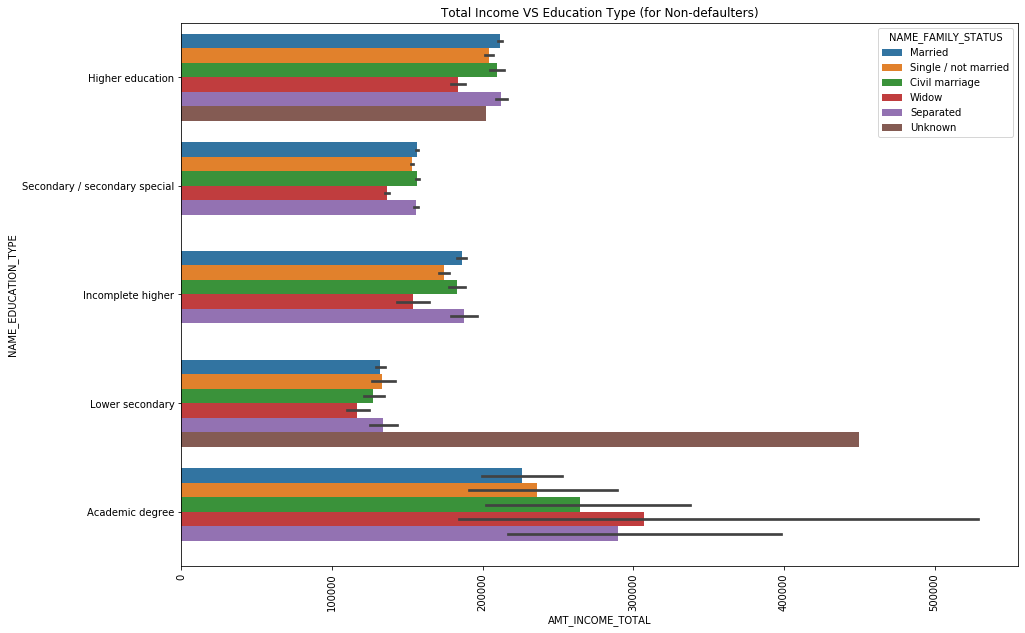

In [73]:
plt.figure(figsize=(15,10))
sns.barplot(data =NoDiff, x='AMT_INCOME_TOTAL',y='NAME_EDUCATION_TYPE', hue ='NAME_FAMILY_STATUS')
plt.title('Total Income VS Education Type (for Non-defaulters)')
plt.xticks(rotation=90)
plt.show()

THe insights from the above plot are as follows:
1. No matter which family status, people with academic degree tend to be non-defaulters, when comapared with other educational qualifications.
2. People of all educational backgrounds having a total income of more than 1 lakh tend to be non-defaulters.
3. A large amount of data has fallen in the 'Unknown' bar of the lower secondary education group. This will influence the distribution of data in that group with respect to the family status.
4. Widows having academic degree, have higher total income as compared to other family types and tend to be non-defaulters.
5. Widows of other educational backgrounds other than academic degree even with lower income as compared to other family types, tend to be non-defaulters.
6. Among non-defaulters, people having academic degree tend to earn higher as compared to people with higher education.

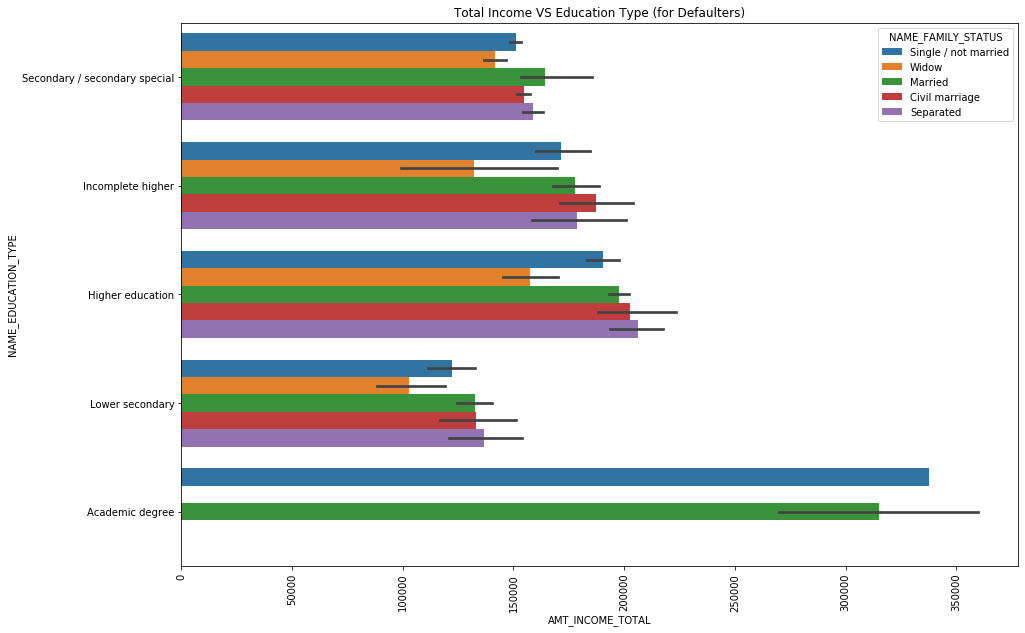

In [75]:
plt.figure(figsize=(15,10))
sns.barplot(data =Diff, x='AMT_INCOME_TOTAL',y='NAME_EDUCATION_TYPE', hue ='NAME_FAMILY_STATUS')
plt.title('Total Income VS Education Type (for Defaulters)')
plt.xticks(rotation=90)
plt.show()

Insights from the above plot are as follows:
1. The only two family types which have defaulted as per the data among people having academic degree are - single/unmarried or married people
2. They are also the highest defaulters when compared to other educational qualifications.
3. Lower secondary people of all family types tend to default the least relatively.
4. Higher education people tend to default the most (if not including academic degree people in the comparison)
5. Separated people having higher education are among the highest defaulters, just behind single and married people respectively having academic degree.
6. Widows are the least defaulters among all family types.
7. Civil marriage people tend to default higher than normal married people except when the education background is secondary/secondary special.

#### Credit Amount Vs Education Type (w.r.to Family status)

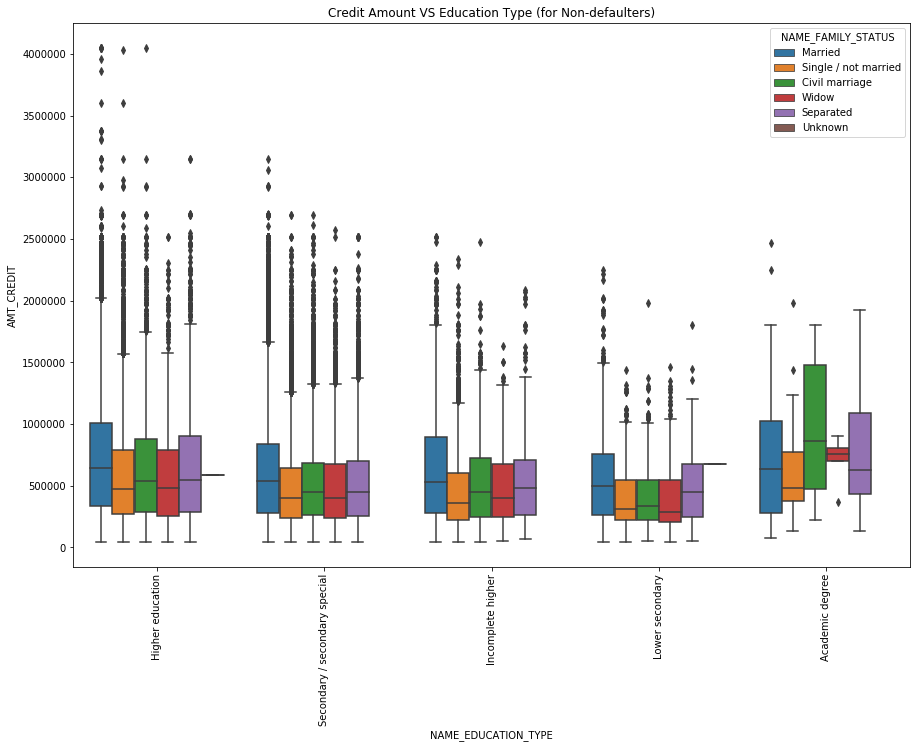

In [76]:
plt.figure(figsize=(15,10))
sns.boxplot(data =NoDiff, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Credit Amount VS Education Type (for Non-defaulters)')
plt.xticks(rotation=90)
plt.show()

The insights from the above plot are as follows:
1. Except in the academic degree group, all other groups have a large number of outliers when it comes to the value of credit amount.
2. The largest number of outliers happen to be in the case of the group of higher education.
3. Almost all Amount Credit IQRs of all educational qualification groups are less than 1 lakh except in the case of Academic degree.
4. People having an academic degree and having done civil marriage tend to get a higher credit amount and also tend to be non-defaulters.
5. Widows generally have a low credit amount value as compared to other family types across all educational qualification types except academic degree holders.
6. Academic degree holders generally tend to get high credit amount and are non-defaulters.
7. Among non-defaulters, single people having lower secondary education tend to receive low credit amount. Higher amounts may lead to default.

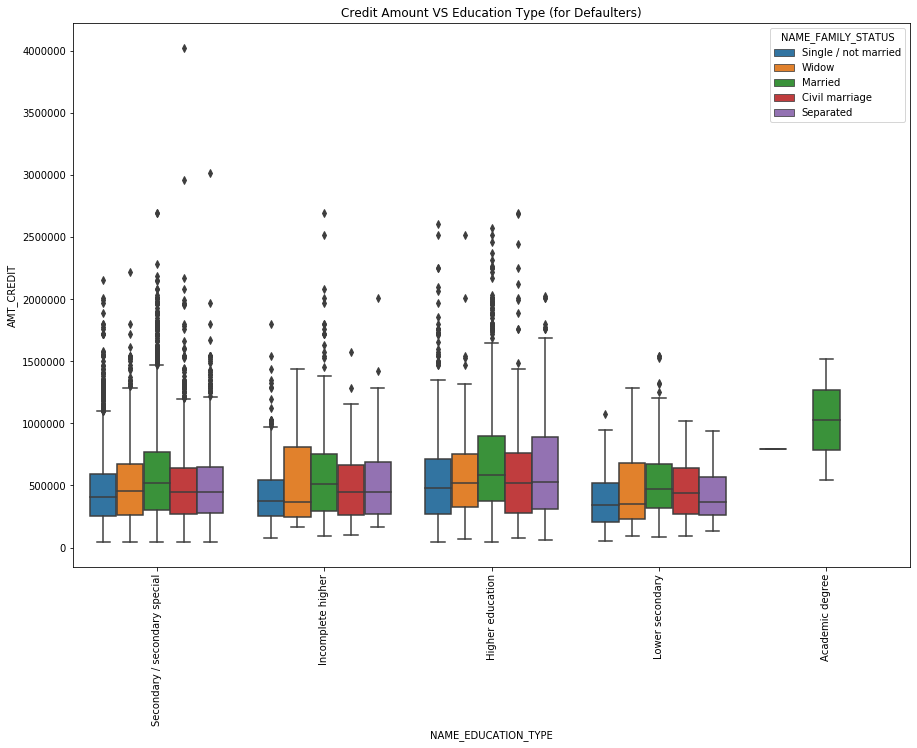

In [77]:
plt.figure(figsize=(15,10))
sns.boxplot(data =Diff, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Credit Amount VS Education Type (for Defaulters)')
plt.xticks(rotation=90)
plt.show()

The insights from the above plot are as follows:
1. Married people seem to have higher credit amount among all defaulters across all educational backgrounds.
2. Not many defaulters except married people fall in the academic degree group.
3. Separated people having higher education having a varying amount credit tend to default when compared to other family types.
4. Single people, inspite of having least credit amount among all family types in all educational backgrounds, tend to default.

## 6) Correlation Matrix

### Correlation matrix for Non-Defaulters

In [80]:
#Looking for inter-column correlation within the non-defaulters dataframe.
df_1=NoDiff.corr()
df_1

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,APARTMENTS_AVG,YEARS_BUILD_AVG,LANDAREA_AVG,AGE
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,-0.001346,0.001744,...,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,0.001324,0.005692,0.002822,0.001346
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356,...,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.012354,0.030897,-0.003903,-0.336966
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250,...,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.103896,0.044157,-0.006790,-0.062609
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,-0.047378,-0.072515,...,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.059580,0.037033,0.005497,0.047378
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,0.012263,-0.106425,...,0.041992,0.080665,0.075487,-0.005675,0.001520,0.010582,0.076522,0.036074,0.007593,-0.012263
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,-0.044565,-0.071051,...,0.026731,0.054922,0.054414,-0.024878,-0.016744,0.001310,0.063615,0.042771,0.012315,0.044565
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,-0.025244,-0.006961,...,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502,0.207894,-0.056689,-0.053004,0.025244
DAYS_BIRTH,-0.001346,NaN,0.336966,0.062609,-0.047378,0.012263,-0.044565,-0.025244,1.000000,-0.618048,...,0.066252,0.097908,0.071648,0.179772,0.241904,0.160072,0.008427,0.028159,0.003417,-1.000000
DAYS_EMPLOYED,0.001744,NaN,-0.243356,-0.141250,-0.072515,-0.106425,-0.071051,-0.006961,-0.618048,1.000000,...,-0.035854,-0.108539,-0.097022,-0.089586,-0.254453,-0.219190,-0.019203,-0.007882,-0.009761,0.618048


### Top 10 Correlations for Non-defaulters

In [79]:
cor1=df_1.unstack()
cor1.sort_values(ascending=False).drop_duplicates().head(11)   #Top 10 correlations are sorted form the dataset


AGE                          AGE                            1.000000
AMT_CREDIT                   AMT_GOODS_PRICE                0.987250
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY    0.950149
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830381
AMT_GOODS_PRICE              AMT_ANNUITY                    0.776686
AMT_ANNUITY                  AMT_CREDIT                     0.771309
FLAG_EMP_PHONE               DAYS_BIRTH                     0.622073
AGE                          DAYS_EMPLOYED                  0.618048
APARTMENTS_AVG               LANDAREA_AVG                   0.494674
dtype: float64

Text(0.5, 1, 'Plot-1')

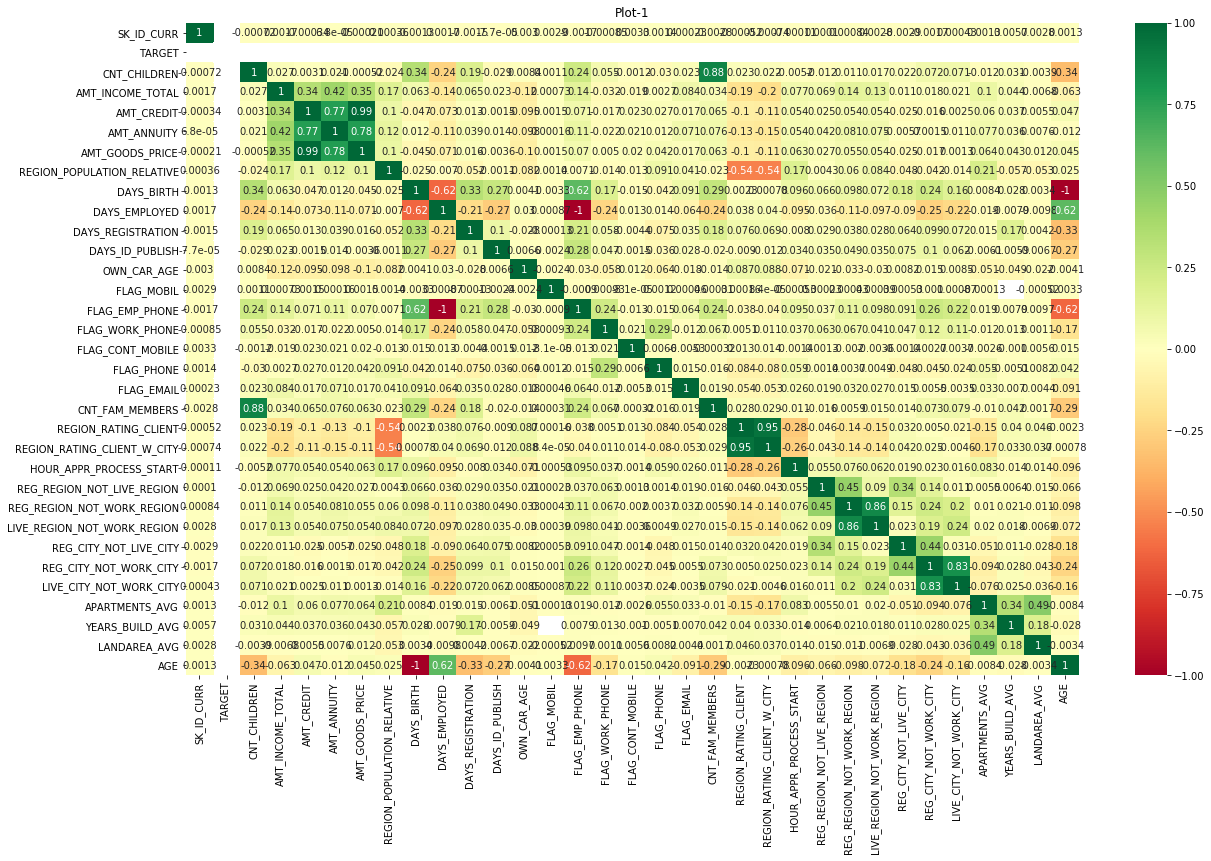

In [55]:
plt.figure(figsize=[20,12])
ax=sns.heatmap(df_1,cmap="RdYlGn",annot= True)
plt.title('Plot-1')


Insights from the above plot for non-defaulters:
1. Income and loan credit amount tend to show good correlation as higher income tends to provide an assurance of payment of dues even for higher loan amounts.
2. Higher income people tend to have lower region rating.
3. Regional population has a negative correlation with the region's ratings.
4. People of higher age who tend to furnish their phone numbers tend to be non-defaulters.


### Correlation matrix for Defaulters

In [86]:
df_2=Diff.corr()
df_2

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,APARTMENTS_AVG,YEARS_BUILD_AVG,LANDAREA_AVG,AGE
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,-0.001254,-0.005151,...,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,0.004968,0.008349,-0.016790,0.001254
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,0.259109,-0.191942,...,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.019326,0.024057,0.008967,-0.259109
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,0.003096,-0.014979,...,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,0.006990,0.006456,0.001657,-0.003096
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,-0.135316,-0.000968,...,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.061671,0.007573,0.012649,0.135316
AMT_ANNUITY,-0.007578,NaN,0.031257,0.046421,0.752195,1.000000,0.752699,0.071690,-0.014303,-0.082552,...,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.063486,-0.002982,0.022058,0.014303
AMT_GOODS_PRICE,-0.001816,NaN,-0.008112,0.037583,0.983103,0.752699,1.000000,0.076049,-0.135810,0.003587,...,0.022392,0.036261,0.035484,-0.034115,-0.038916,-0.016685,0.069616,0.015427,0.022612,0.135810
REGION_POPULATION_RELATIVE,0.006301,NaN,-0.031975,0.009135,0.069161,0.071690,0.076049,1.000000,-0.048190,0.015103,...,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.160067,-0.068306,-0.028988,0.048190
DAYS_BIRTH,-0.001254,NaN,0.259109,0.003096,-0.135316,-0.014303,-0.135810,-0.048190,1.000000,-0.575097,...,0.054654,0.069564,0.045517,0.161858,0.215192,0.123623,-0.016966,0.029515,0.008989,-1.000000
DAYS_EMPLOYED,-0.005151,NaN,-0.191942,-0.014979,-0.000968,-0.082552,0.003587,0.015103,-0.575097,1.000000,...,-0.033331,-0.088954,-0.077201,-0.084961,-0.242019,-0.196453,0.011253,0.012363,-0.014731,0.575097


### Top 10 Correlations for Defaulters

In [87]:
cor2=df_2.unstack()
cor2.sort_values(ascending=False).drop_duplicates().head(11)   #Top 10 correlations are sorted form the dataset

AGE                          AGE                           1.000000
AMT_GOODS_PRICE              AMT_CREDIT                    0.983103
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.956637
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.885484
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.778540
AMT_GOODS_PRICE              AMT_ANNUITY                   0.752699
AMT_ANNUITY                  AMT_CREDIT                    0.752195
DAYS_BIRTH                   FLAG_EMP_PHONE                0.578519
DAYS_EMPLOYED                AGE                           0.575097
LANDAREA_AVG                 APARTMENTS_AVG                0.527900
dtype: float64

Text(0.5, 1, 'Plot-1')

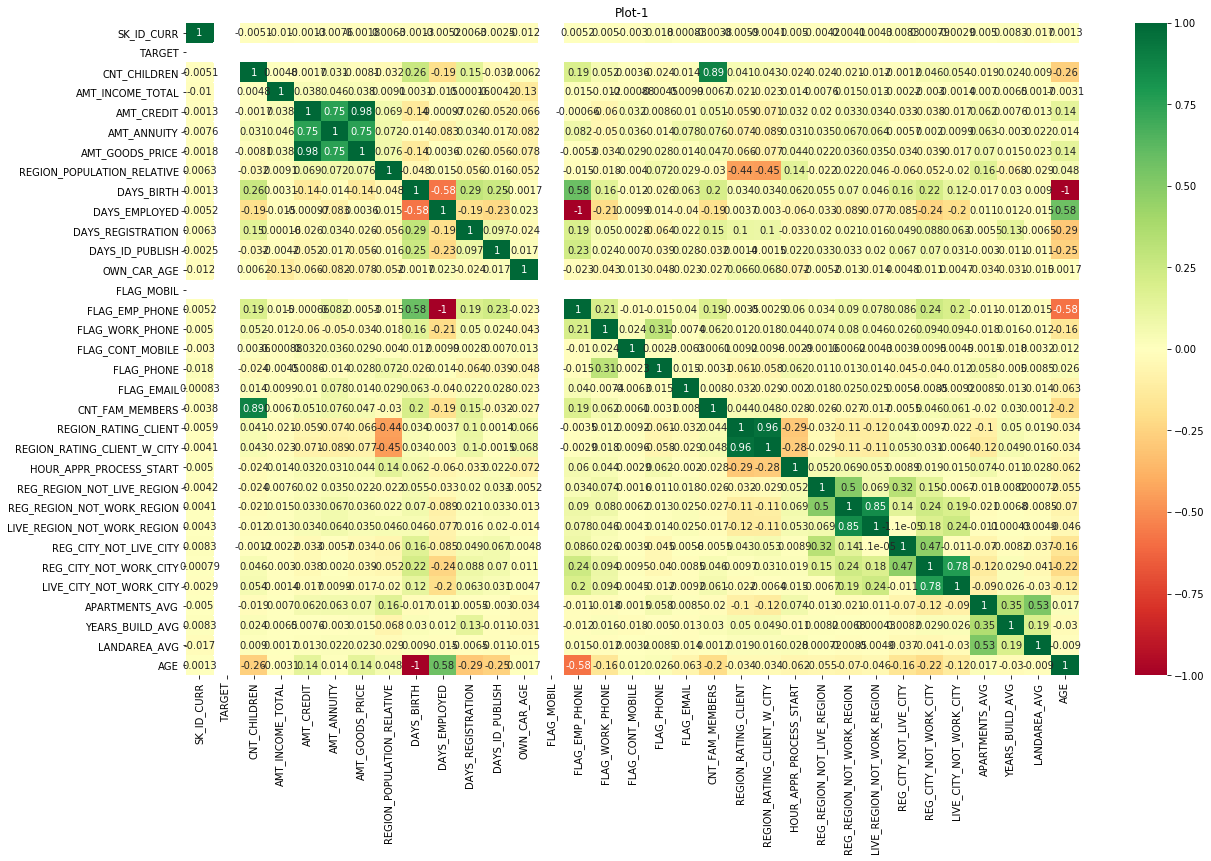

In [58]:
plt.figure(figsize=[20,12])
ax=sns.heatmap(df_2,cmap="RdYlGn",annot= True)
plt.title('Plot-1')

### Merging 'Previous Application data' with 'Application data'

In [88]:
df_comb=pd.merge(left=df4PrevApp,right=df3AppData,how='inner',on='SK_ID_CURR',suffixes='_x')
df_comb.head(20)                                                   # the combined dataset is named as df_comb

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_,AMT_ANNUITY_,AMT_APPLICATION,AMT_CREDIT_,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,APARTMENTS_AVG,YEARS_BUILD_AVG,LANDAREA_AVG,INCOME_RANGE,CREDIT_RANGE,AGE,AGE_BRACKET
0,2030495,271877,Consumer loans,1730.430,17145.00,17145.0,0.00,17145.00,SATURDAY,15,...,0,0,Military,0.0557,0.7552,0.0117,200000-250000,500000-600000,39.569863,30-40
1,1696966,271877,Consumer loans,68258.655,1800000.00,1754721.0,180000.00,1800000.00,SATURDAY,18,...,0,0,Military,0.0557,0.7552,0.0117,200000-250000,500000-600000,39.569863,30-40
2,2154916,271877,Consumer loans,12417.390,108400.50,119848.5,0.00,108400.50,SUNDAY,14,...,0,0,Military,0.0557,0.7552,0.0117,200000-250000,500000-600000,39.569863,30-40
3,2802425,108129,Cash loans,25188.615,607500.00,679671.0,NaN,607500.00,THURSDAY,11,...,0,0,Self-employed,NaN,NaN,NaN,50000-100000,0-200000,58.452055,50-60
4,1536272,108129,Cash loans,21709.125,450000.00,512370.0,NaN,450000.00,WEDNESDAY,9,...,0,0,Self-employed,NaN,NaN,NaN,50000-100000,0-200000,58.452055,50-60
5,2068863,108129,Consumer loans,4830.930,47250.00,23688.0,24750.00,47250.00,THURSDAY,11,...,0,0,Self-employed,NaN,NaN,NaN,50000-100000,0-200000,58.452055,50-60
6,2551979,108129,Consumer loans,6664.275,71352.00,71352.0,0.00,71352.00,WEDNESDAY,9,...,0,0,Self-employed,NaN,NaN,NaN,50000-100000,0-200000,58.452055,50-60
7,2517198,108129,Revolving loans,11250.000,0.00,225000.0,NaN,NaN,TUESDAY,13,...,0,0,Self-employed,NaN,NaN,NaN,50000-100000,0-200000,58.452055,50-60
8,1760610,108129,Consumer loans,8593.965,33052.50,33052.5,0.00,33052.50,SUNDAY,10,...,0,0,Self-employed,NaN,NaN,NaN,50000-100000,0-200000,58.452055,50-60
9,2523466,122040,Cash loans,15060.735,112500.00,136444.5,NaN,112500.00,TUESDAY,11,...,0,0,Postal,0.1206,NaN,0.0237,0-50000,200000-300000,28.879452,20-30


In [89]:
#Renaming some columns in the new combined dataset
df_comb = df_comb.rename({'AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                        'NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV','AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV'}, axis=1)

In [90]:
df_comb.shape

(1413701, 84)

### Analysis of the combined dataframe 

#### Credit amount Vs Loan Purpose

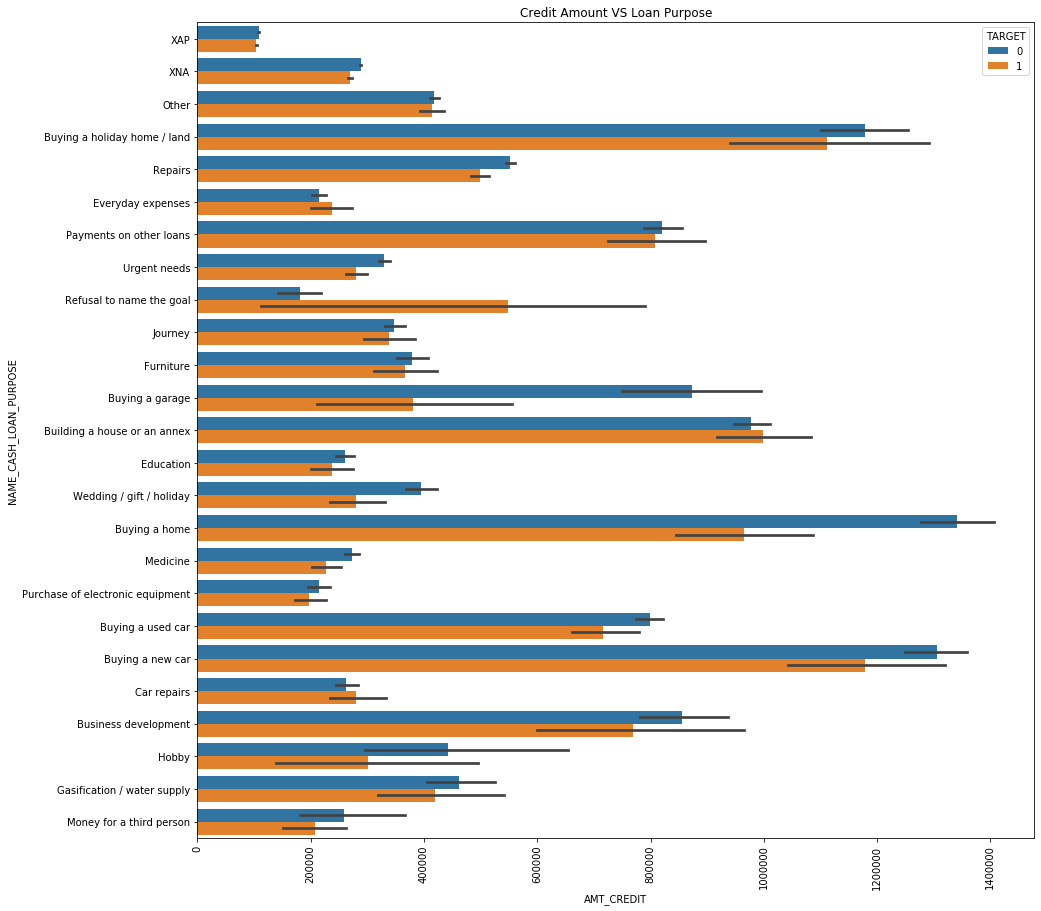

In [91]:
plt.figure(figsize=(15,15))
sns.barplot(data =df_comb, x='AMT_CREDIT',y='NAME_CASH_LOAN_PURPOSE',hue='TARGET')
plt.title('Credit Amount VS Loan Purpose')
plt.xticks(rotation=90)
plt.show()

Insights based on the above plot showing purpose of loan w.r.t. the amount credited after combining all current and previous applications are :
1. Most people apply for high credit amount loans for housing purposes - buying a home, building a house or an annex, buying a holiday home/land.
2. This is followed by buying a new or used car, business development or payment on other loans.
3. Least credit amount is seen for purchase of electronic equipment or money for a third person.
4. Highest defaults when compared to non-defaults are seen in the case of - refusal to reveal the goal.
5. High defaults are seen as compared to non-defaults in the case of 'Car Repairs' too.

#### Credit Amount for Previous Loan Vs Loan Purpose

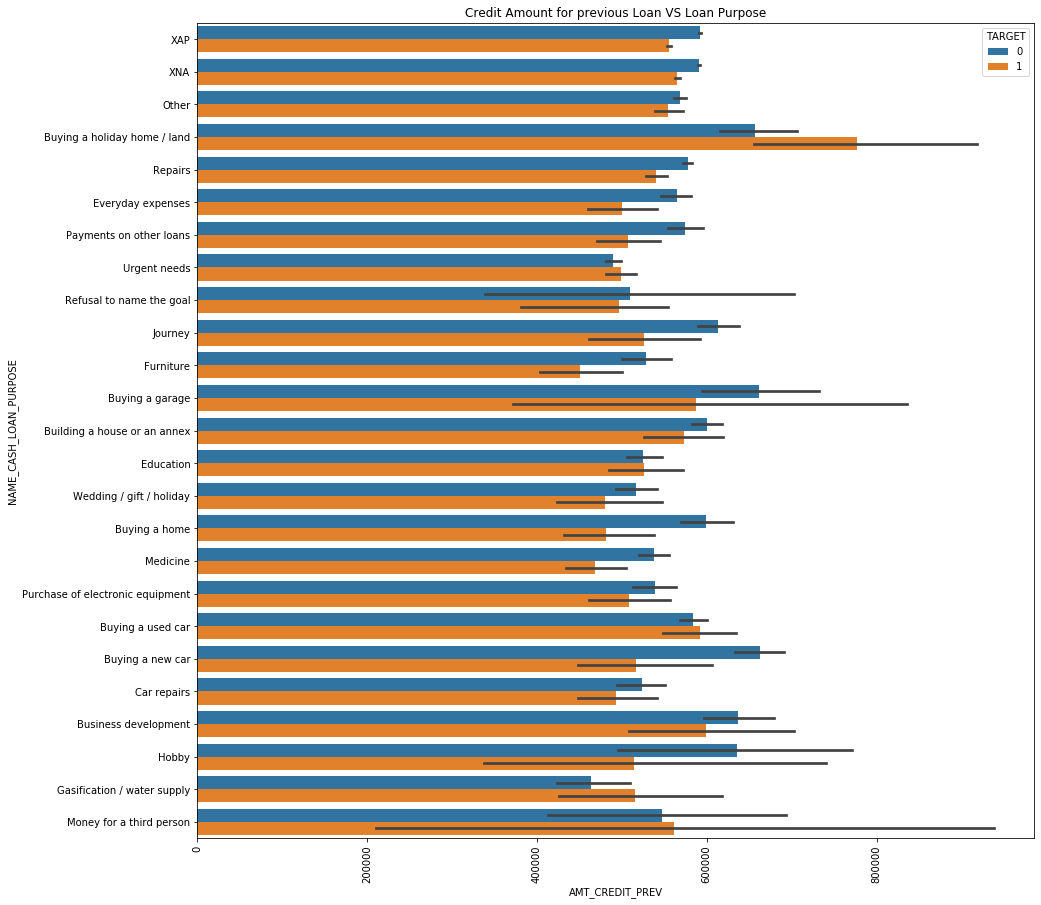

In [87]:
plt.figure(figsize=(15,15))
sns.barplot(data =df_comb, x='AMT_CREDIT_PREV',y='NAME_CASH_LOAN_PURPOSE',hue='TARGET')
plt.title('Credit Amount for previous Loan VS Loan Purpose')
plt.xticks(rotation=90)
plt.show()

When viewing the same sort of plot for the previous loan applications it is observed that:
1. Most defaults are on the loan amounts which was used for buying a holiday home/land.
2. High defaults were observed in the case of - gasification/water supply, money for a third person, buying a used car, education and urgent needs.
3. Buying a used car had higher defaults as compared to buying a new car.
4. In fact the highest differnce between defaults and non-defaults target variable was seen in the case of buying a new car where most paid the dues on time when the loan amount was used for that purpose.

#### Credit Amount for Previous Loan Vs Loan Purpose w.r.to Previous Loan status

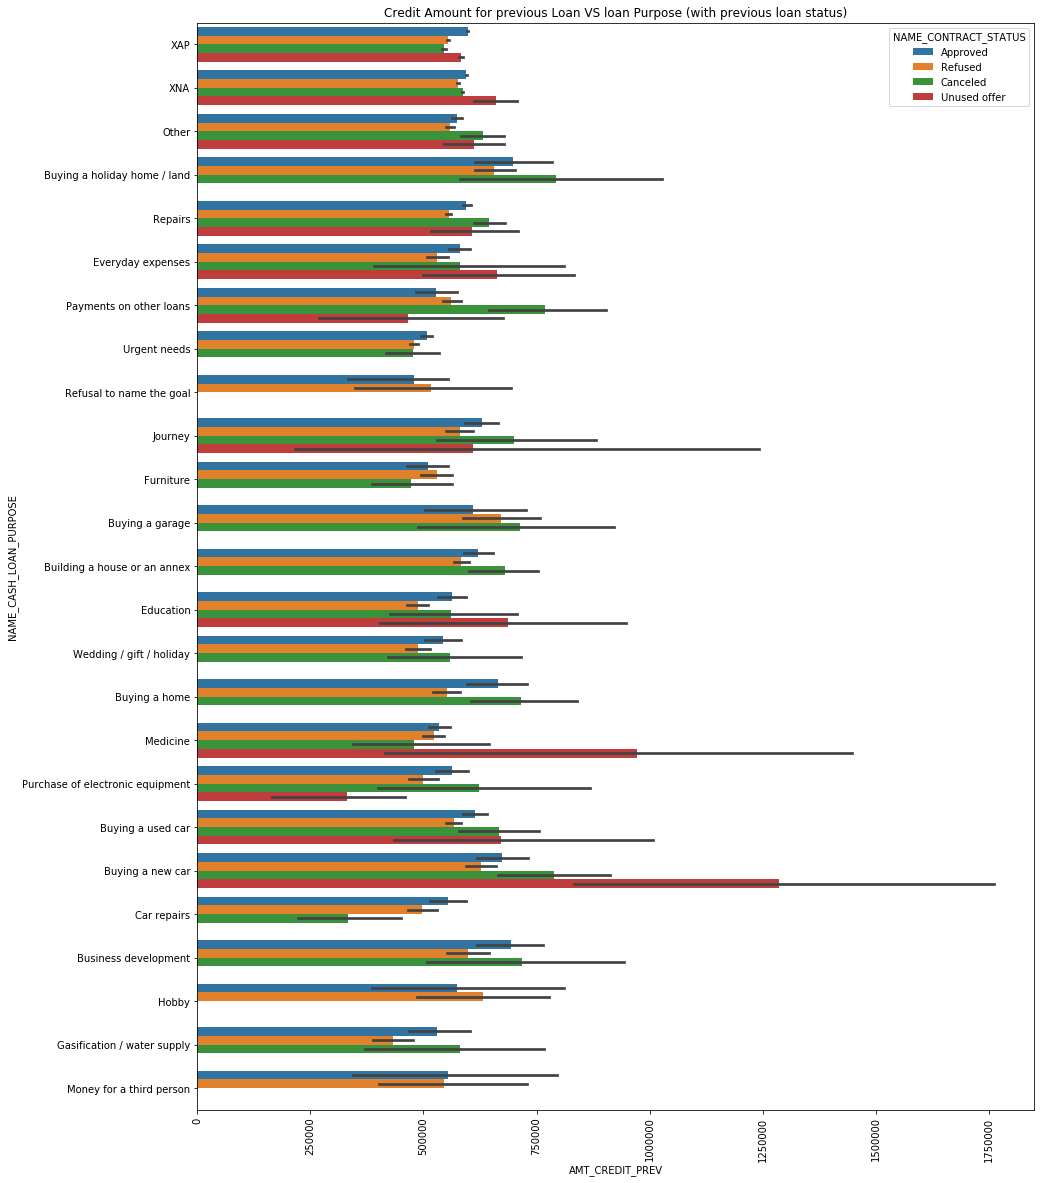

In [88]:
plt.figure(figsize=(15,20))
sns.barplot(data =df_comb, x='AMT_CREDIT_PREV',y='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.title('Credit Amount for previous Loan VS loan Purpose (with previous loan status)')
plt.xticks(rotation=90)
plt.show()

Insights based on the above plot are as follows:
1. Applicants seem to cancel or not use offers for loans taken with the purpose declared as buying a new car, medicine or journey. A better rate may help get a lot of customers.
2. A high rate of refusals are seen in the case of purpose been declared as 'Hobby'. The refusals are more than approvals in that case.
3. There seems to be high refusal of offers as the client has cancelled the loan, for loans taken with the purpose of - buying a holiday home/land, payment on other loans, buying a new car, building a garage, etc.

#### Income Range Vs Applied amount

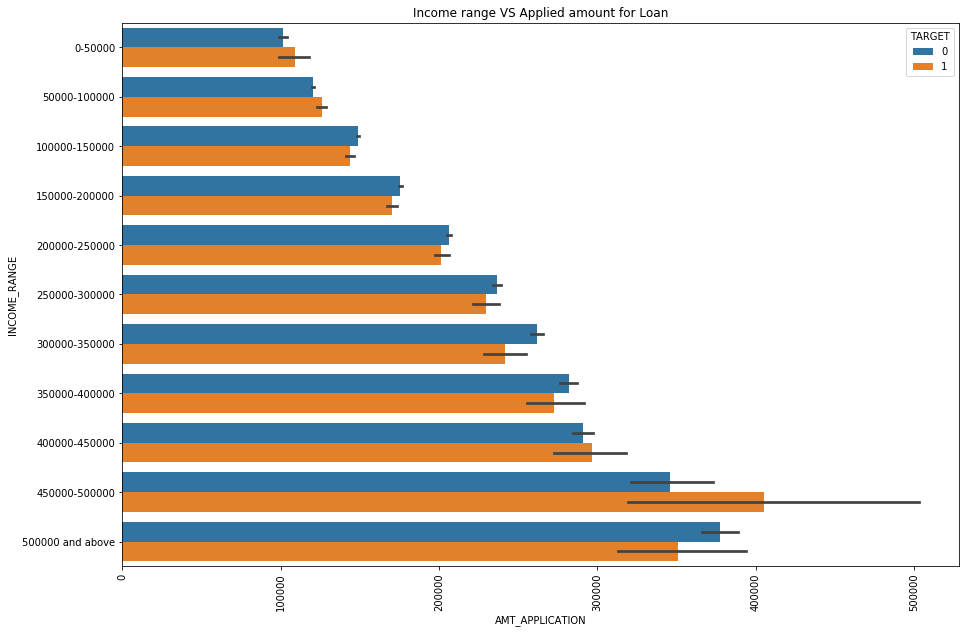

In [89]:
plt.figure(figsize=(15,10))
sns.barplot(data =df_comb, x='AMT_APPLICATION',y='INCOME_RANGE',hue='TARGET')
plt.title('Income range VS Applied amount for Loan')
plt.xticks(rotation=90)
plt.show()

When it comes to income range vs application amount comparison, the following points can be observed:
1. With rising income ranges, higher loan amounts can be observed.
2. Low income ranges of <1 lakh showcase a lot of defaults on timely payments even when the loan application amount is less. A reduction in loan amount credit can help reduce the defaults and won't lead to customer churn.
3. Applicants earning between 4.5 to 5 lakhs have a higher relative number of defaults in payment of high loan application amount when compared to any other income group.
4. The highest positive imbalance between defaults and non-defaults where non-defaults are higher than defaults is found for the applicants having an income range of 3-3.5 lakhs and loan application amount of around 2.5 lakhs.

#### Amount Applied Vs Loan Purpose w.r.to gender

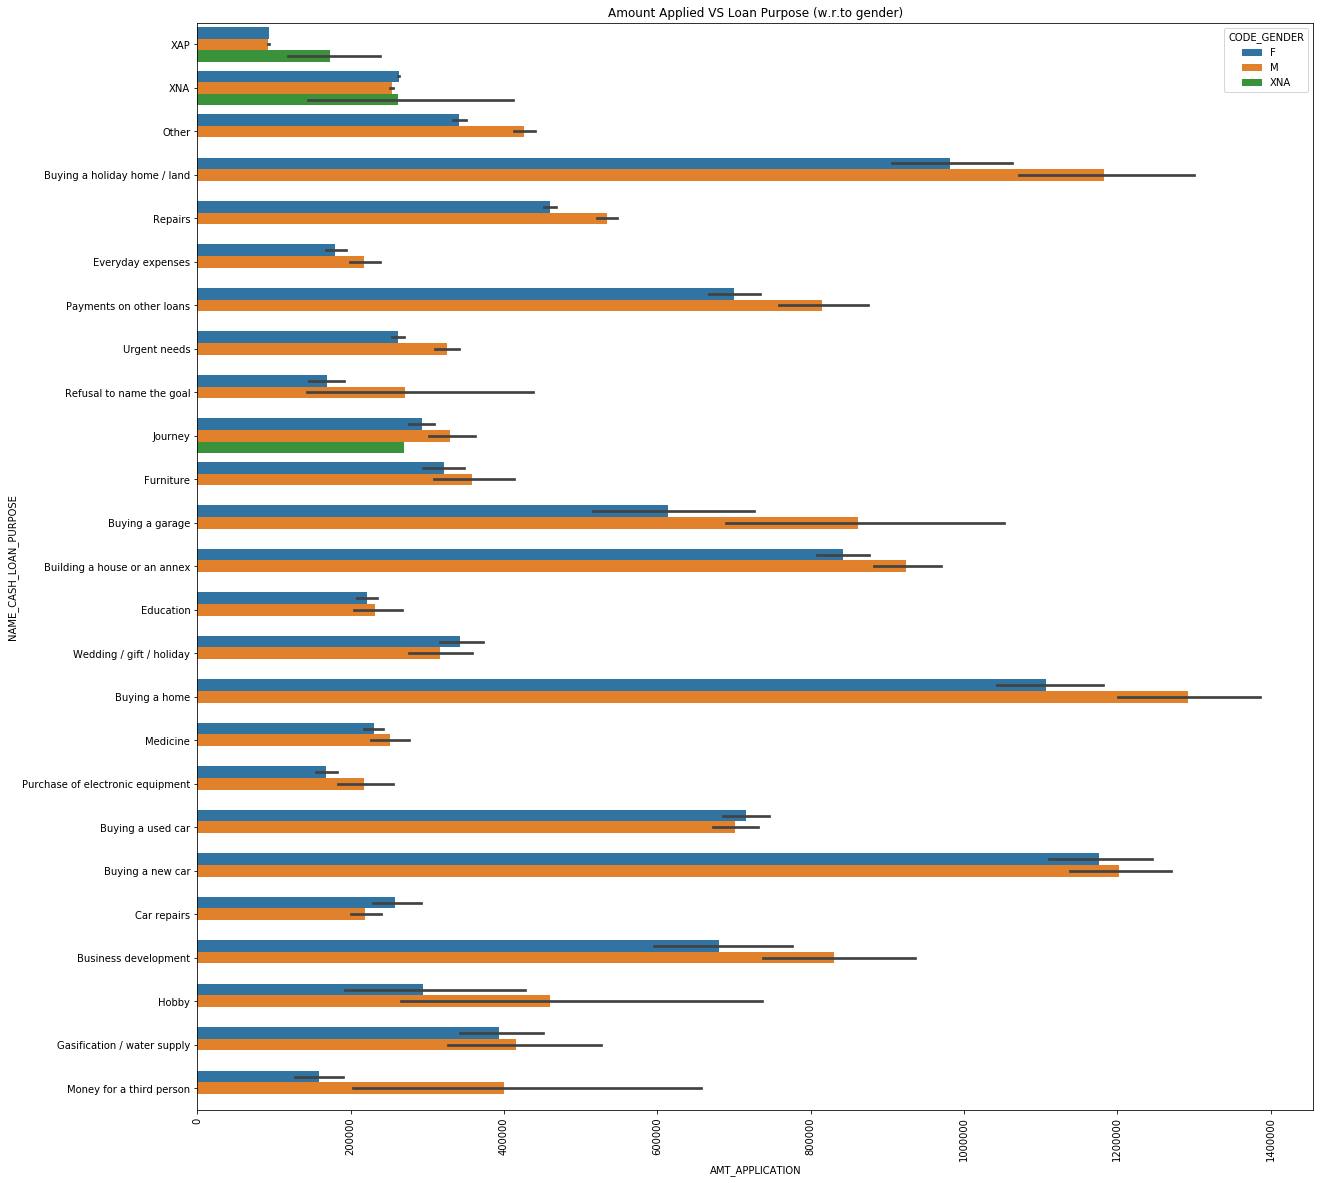

In [90]:
plt.figure(figsize=(20,20))
sns.barplot(data =df_comb, x='AMT_APPLICATION',y='NAME_CASH_LOAN_PURPOSE',hue='CODE_GENDER')
plt.title('Amount Applied VS Loan Purpose (w.r.to gender)')
plt.xticks(rotation=90)
plt.show()

Based on the above plot, the following insights can be found:
1. The highest application amount was observed for buying a home by males and buying a new car by females.
2. Although in both the above cases, males have applied for higher loan amounts.
3. Females have applied for a very low amount for 'Money for a third person' as compared to Males.
4. In most cases males have applied for higher loan amounts except in cases such as - Wedding/Gift/Holiday, buying a used car and car repairs. The last two are related to each other as used cars may lead to higher car repair costs.
5. High imbalance in loan application amounts are seen in the case of - Money for a third person, business development, buying a house, buying a garage and buying a holiday home/land.

## Conclusion

#### 1) It is advisable to not approve any loans for higher aged widows (>55 years old), as they tend to default more among the general population
#### 2) Since Married people tend to default less in lower ages and having high income, loans could be easily approved for them
#### 3) Single or married people having an academic degree tend to default more. Therefore, they should be throughly scrutinized before their loans are approved
#### 4) Since the highest defaults are observed in the case of refusal to reveal the goal, loans should be only approved to people who clearly state the reason/objective of the loan applied
#### 5) Applicants earning between 4.5 to 5 lakhs have a higher relative number of defaults in payment of high loan application amount when compared to any other income group. Thus, applicants falling under the above age group should not be awarded high amount loans to ensure the proper payment of the loan.